## DATA1

## Importar Librerias

In [261]:
import requests
import zipfile
import pandas as pd
import numpy as np
import folium

import altair

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import plotly.express as px
from folium import plugins

import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium import plugins
import geocoder
from matplotlib.animation import FuncAnimation

import os
import re

from datetime import timedelta


## Importar CVS

In [262]:
# Ruta del directorio 
directorio_destino = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos'

# Ruta del archivo Excel
ruta_archivo_excel = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos\datos vitrina inteligente.xlsx'

# Cargar el archivo Excel en un DataFrame
vitrinas = pd.read_excel(ruta_archivo_excel)

# Mostrar el DataFrame
print(vitrinas)

        ID     Status                 Date                Market  \
0    33529  completed  12/03/2024 16:04:16  Umbrellas Market 121   
1    33528  completed  12/03/2024 16:03:54  Umbrellas Market 120   
2    33522  completed  12/03/2024 15:29:14  Umbrellas Market 120   
3    33521  completed  12/03/2024 15:28:13  Umbrellas Market 120   
4    33521  completed  12/03/2024 15:28:13  Umbrellas Market 120   
..     ...        ...                  ...                   ...   
593  28788  completed  08/01/2024 14:21:51  Umbrellas Market 121   
594  28787  completed  08/01/2024 14:21:41  Umbrellas Market 120   
595  28778  completed  08/01/2024 13:37:36  Umbrellas Market 120   
596  28776  completed  08/01/2024 13:21:05  Umbrellas Market 120   
597  28772  completed  08/01/2024 12:54:13  Umbrellas Market 121   

         Equipment External Code                      Product  \
0    Umbrellas 121             -        BOCADILLO POLLO CESAR   
1    Umbrellas 120             -          WRAP DE POL

In [263]:
print("Ruta del directorio:", directorio_destino)

Ruta del directorio: C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos


In [264]:
vitrinas.shape

(598, 22)

In [265]:
# Se unifico las hojas del archivo excel, el datasets tiene dos hojas de las ventas de vitrinas.
directorio_destino = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos'

# Generar un solo datasets.
dataframes = []
for hoja_nombre in pd.ExcelFile(ruta_archivo_excel).sheet_names:
    df_hoja = pd.read_excel(ruta_archivo_excel, sheet_name=hoja_nombre)
    dataframes.append(df_hoja)

# Concatenar todos los DataFrames en uno solo
vitrinas = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame resultante
print(vitrinas)

        ID     Status                 Date                Market  \
0    33529  completed  12/03/2024 16:04:16  Umbrellas Market 121   
1    33528  completed  12/03/2024 16:03:54  Umbrellas Market 120   
2    33522  completed  12/03/2024 15:29:14  Umbrellas Market 120   
3    33521  completed  12/03/2024 15:28:13  Umbrellas Market 120   
4    33521  completed  12/03/2024 15:28:13  Umbrellas Market 120   
..     ...        ...                  ...                   ...   
712  29170  completed  12/01/2024 13:28:55  Umbrellas Market 122   
713  29084  completed  11/01/2024 14:07:43  Umbrellas Market 122   
714  29082  completed  11/01/2024 14:03:10  Umbrellas Market 122   
715  29022  completed  10/01/2024 14:21:44  Umbrellas Market 122   
716  29022  completed  10/01/2024 14:21:44  Umbrellas Market 122   

         Equipment External Code                              Product  \
0    Umbrellas 121             -                BOCADILLO POLLO CESAR   
1    Umbrellas 120             -     

In [266]:
vitrinas.shape

(717, 22)

# Limpieza del DataFrames #

## Ventas Vitrinas (120,121,122)

In [267]:
vitrinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              717 non-null    int64  
 1   Status          717 non-null    object 
 2   Date            717 non-null    object 
 3   Market          717 non-null    object 
 4   Equipment       717 non-null    object 
 5   External Code   717 non-null    object 
 6   Product         717 non-null    object 
 7   Product Type    717 non-null    object 
 8   Weight          717 non-null    int64  
 9   Quantity        717 non-null    int64  
 10  Discount Code   717 non-null    object 
 11  Combo           717 non-null    object 
 12  Base Value      717 non-null    object 
 13  % Tax           717 non-null    int64  
 14  Tax             717 non-null    object 
 15  Price           717 non-null    float64
 16  Payment Method  717 non-null    object 
 17  Happy Hours     717 non-null    obj

In [268]:
vitrinas['Date'] = pd.to_datetime(vitrinas['Date'], format='%d/%m/%Y %H:%M:%S')

In [269]:
vitrinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              717 non-null    int64         
 1   Status          717 non-null    object        
 2   Date            717 non-null    datetime64[ns]
 3   Market          717 non-null    object        
 4   Equipment       717 non-null    object        
 5   External Code   717 non-null    object        
 6   Product         717 non-null    object        
 7   Product Type    717 non-null    object        
 8   Weight          717 non-null    int64         
 9   Quantity        717 non-null    int64         
 10  Discount Code   717 non-null    object        
 11  Combo           717 non-null    object        
 12  Base Value      717 non-null    object        
 13  % Tax           717 non-null    int64         
 14  Tax             717 non-null    object        
 15  Price 

In [270]:
def clasificar_umbrella(market):
    if market in ['Umbrellas Market 120', 'Umbrellas Market 121']:
        return 'Universidad'
    elif market == 'Umbrellas Market 122':
        return 'THE BRIDGE'
    else:
        return 'Otro'  # Opcional: manejar casos no clasificados

# Aplicar la función a la columna "Market" y asignar los resultados a una nueva columna "Umbrella"
vitrinas['Umbrella'] = vitrinas['Market'].apply(lambda x: clasificar_umbrella(x))

# Mostrar el DataFrame con la nueva columna "Umbrella"
print(vitrinas)

        ID     Status                Date                Market  \
0    33529  completed 2024-03-12 16:04:16  Umbrellas Market 121   
1    33528  completed 2024-03-12 16:03:54  Umbrellas Market 120   
2    33522  completed 2024-03-12 15:29:14  Umbrellas Market 120   
3    33521  completed 2024-03-12 15:28:13  Umbrellas Market 120   
4    33521  completed 2024-03-12 15:28:13  Umbrellas Market 120   
..     ...        ...                 ...                   ...   
712  29170  completed 2024-01-12 13:28:55  Umbrellas Market 122   
713  29084  completed 2024-01-11 14:07:43  Umbrellas Market 122   
714  29082  completed 2024-01-11 14:03:10  Umbrellas Market 122   
715  29022  completed 2024-01-10 14:21:44  Umbrellas Market 122   
716  29022  completed 2024-01-10 14:21:44  Umbrellas Market 122   

         Equipment External Code                              Product  \
0    Umbrellas 121             -                BOCADILLO POLLO CESAR   
1    Umbrellas 120             -                 

In [271]:
vitrinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              717 non-null    int64         
 1   Status          717 non-null    object        
 2   Date            717 non-null    datetime64[ns]
 3   Market          717 non-null    object        
 4   Equipment       717 non-null    object        
 5   External Code   717 non-null    object        
 6   Product         717 non-null    object        
 7   Product Type    717 non-null    object        
 8   Weight          717 non-null    int64         
 9   Quantity        717 non-null    int64         
 10  Discount Code   717 non-null    object        
 11  Combo           717 non-null    object        
 12  Base Value      717 non-null    object        
 13  % Tax           717 non-null    int64         
 14  Tax             717 non-null    object        
 15  Price 

EDA Venta Vitrina

In [272]:
grupo_cliente = vitrinas.groupby(['Market', 'Umbrella', 'Product'])['ID'].count().reset_index()

# Renombrar la columna de recuento de ID
grupo_cliente = grupo_cliente.rename(columns={'ID': 'Count'})

# Mostrar el DataFrame agrupado
print(grupo)

                  Market     Umbrella                       Product  Count
0   Umbrellas Market 120  Universidad          BAGEL SALMON AGUACTE     28
1   Umbrellas Market 120  Universidad   BLOOMER PAVO BRASEADO 200GR     11
2   Umbrellas Market 120  Universidad  BLOOMER POLLO BARBACOA 190GR      5
3   Umbrellas Market 120  Universidad          COOL SALMON. NOVEDAD      7
4   Umbrellas Market 120  Universidad                ENSALADA CESAR      2
..                   ...          ...                           ...    ...
75  Umbrellas Market 122   THE BRIDGE     SW Club Pastrami Brooklim      4
76  Umbrellas Market 122   THE BRIDGE           SW ESPECIAL DE ATUN      6
77  Umbrellas Market 122   THE BRIDGE              TENNESSEE BURGER      4
78  Umbrellas Market 122   THE BRIDGE           WRAP DE POLLO CURRY     30
79  Umbrellas Market 122   THE BRIDGE    pincho de tortilla patatas      6

[80 rows x 4 columns]


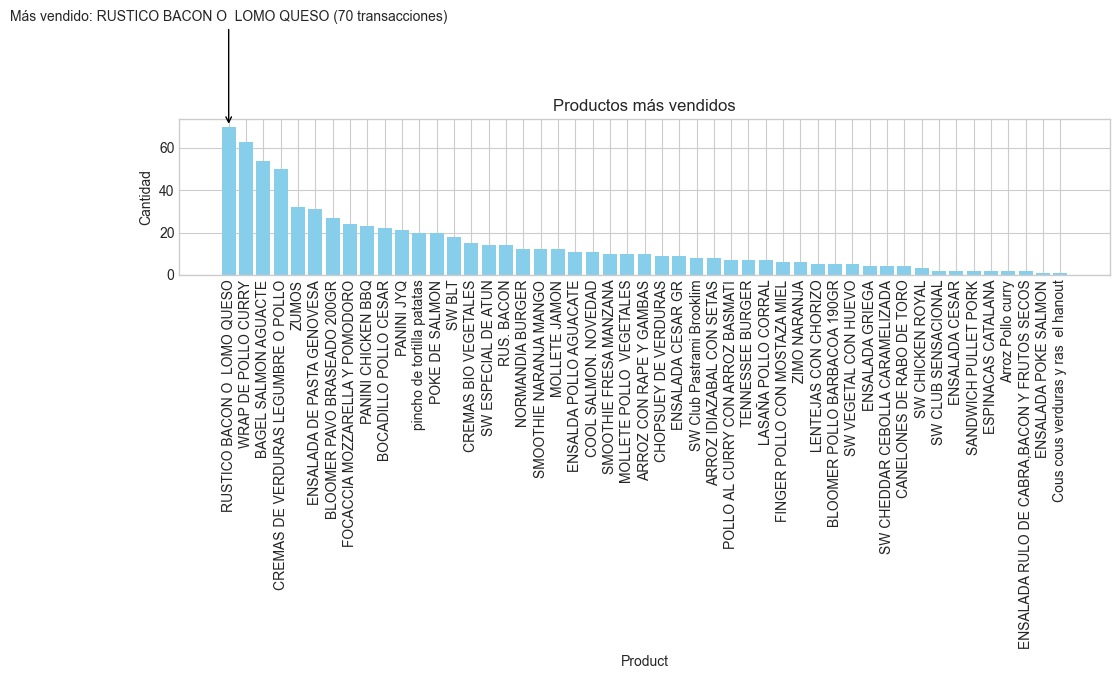

In [273]:
agrupado_por_producto = vitrinas.groupby('Product').size().reset_index(name='Cantidad')

agrupado_por_producto = agrupado_por_producto.sort_values(by='Cantidad', ascending=False)

producto_mas_vendido = agrupado_por_producto.iloc[0]['Product']
cantidad_producto_mas_vendido = agrupado_por_producto.iloc[0]['Cantidad']

plt.figure(figsize=(10, 6))
plt.bar(agrupado_por_producto['Product'], agrupado_por_producto['Cantidad'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Cantidad')
plt.title('Productos más vendidos')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.annotate(f'Más vendido: {producto_mas_vendido} ({cantidad_producto_mas_vendido} transacciones)',
             xy=(producto_mas_vendido, cantidad_producto_mas_vendido),
             xytext=(producto_mas_vendido, cantidad_producto_mas_vendido + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

plt.show()

In [274]:
vitrinas['Date'] = pd.to_datetime(vitrinas['Date'], format='%d/%m/%Y %H:%M:%S')
vitrinas['Mes'] = vitrinas['Date'].dt.month

agrupado_por_mes_y_producto = vitrinas.groupby(['Mes', 'Product']).size().reset_index(name='Cantidad')
agrupado_por_mes_y_producto = agrupado_por_mes_y_producto.sort_values(by=['Mes', 'Cantidad'], ascending=[True, False])

productos_mas_vendidos_por_mes = agrupado_por_mes_y_producto.groupby('Mes').first().reset_index()

print(productos_mas_vendidos_por_mes)

   Mes                              Product  Cantidad
0    1  CREMAS DE VERDURAS LEGUMBRE O POLLO        25
1    2          RUSTICO BACON O  LOMO QUESO        32
2    3          RUSTICO BACON O  LOMO QUESO        19


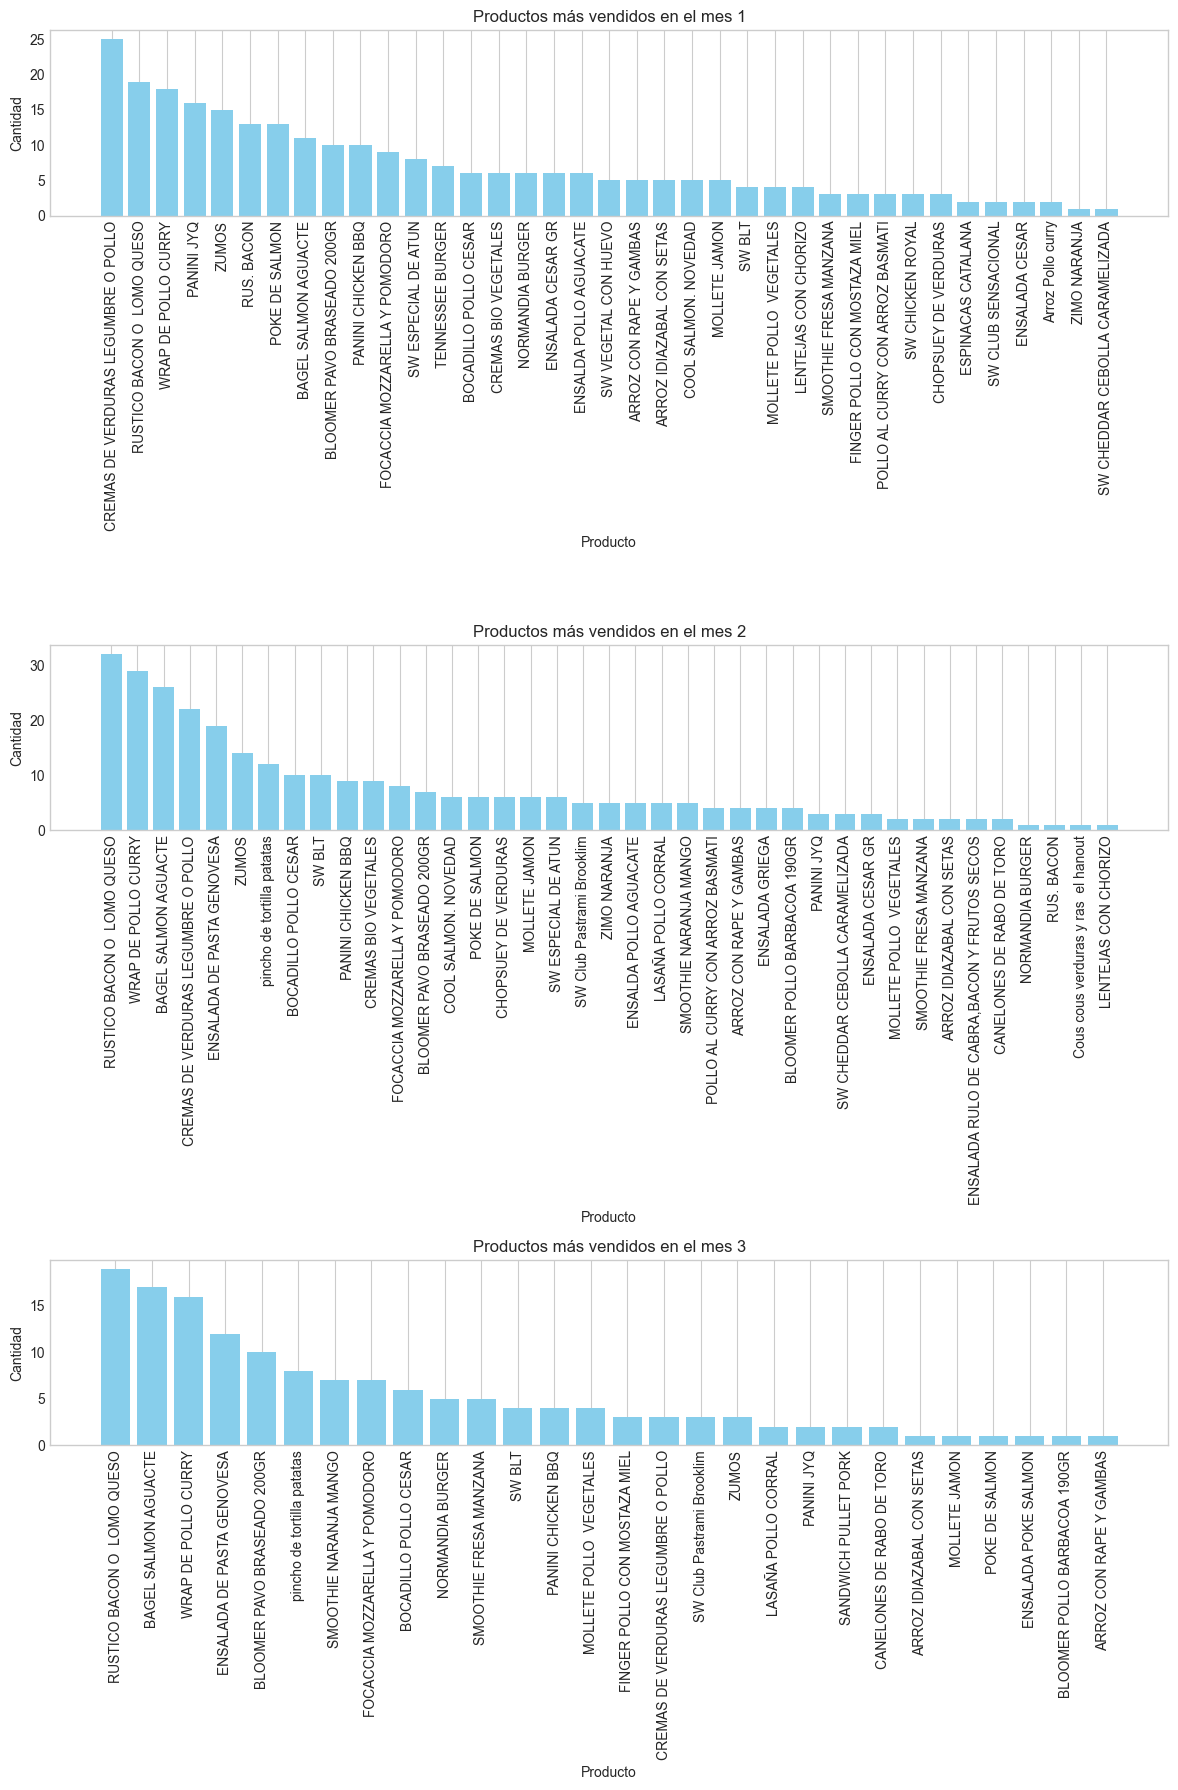

In [275]:
meses = productos_mas_vendidos_por_mes['Mes'].unique()

fig, axs = plt.subplots(nrows=len(meses), figsize=(12, 6 * len(meses)))
for i, mes in enumerate(meses):

    df_mes = vitrinas[vitrinas['Mes'] == mes]
    productos_mes = df_mes.groupby('Product')['Product'].count().sort_values(ascending=False).index
    cantidades_mes = df_mes.groupby('Product')['Product'].count().sort_values(ascending=False).values
    
    axs[i].bar(productos_mes, cantidades_mes, color='skyblue')
    axs[i].set_xlabel('Producto')
    axs[i].set_ylabel('Cantidad')
    axs[i].set_title(f'Productos más vendidos en el mes {mes}')
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].grid(axis='y')
plt.tight_layout()
plt.show()

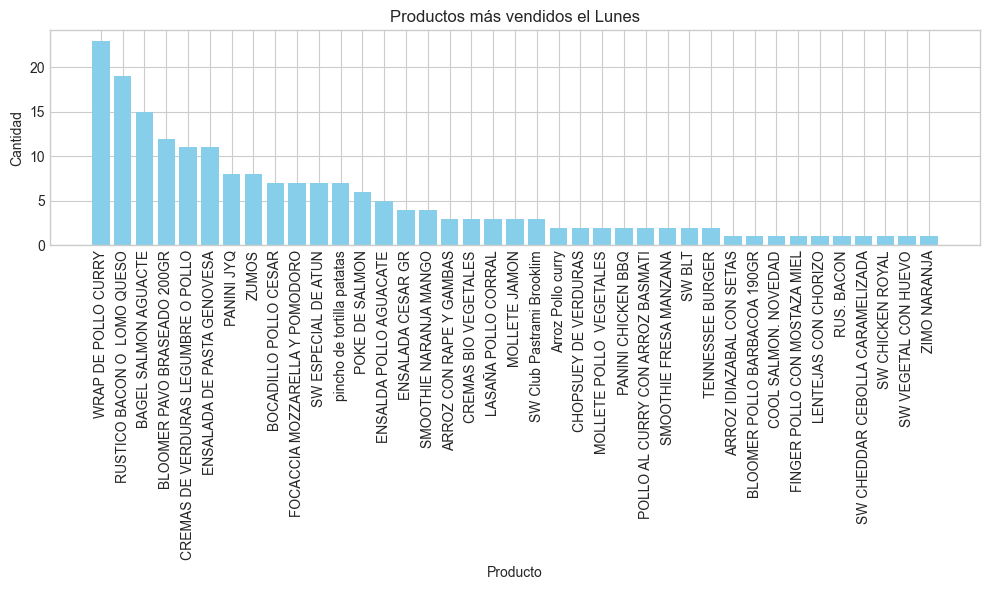

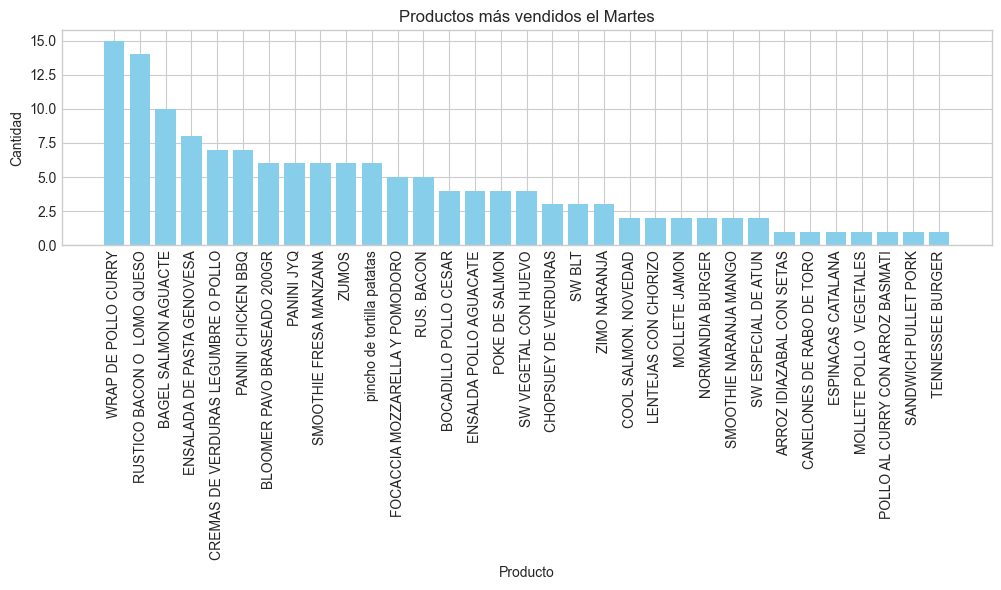

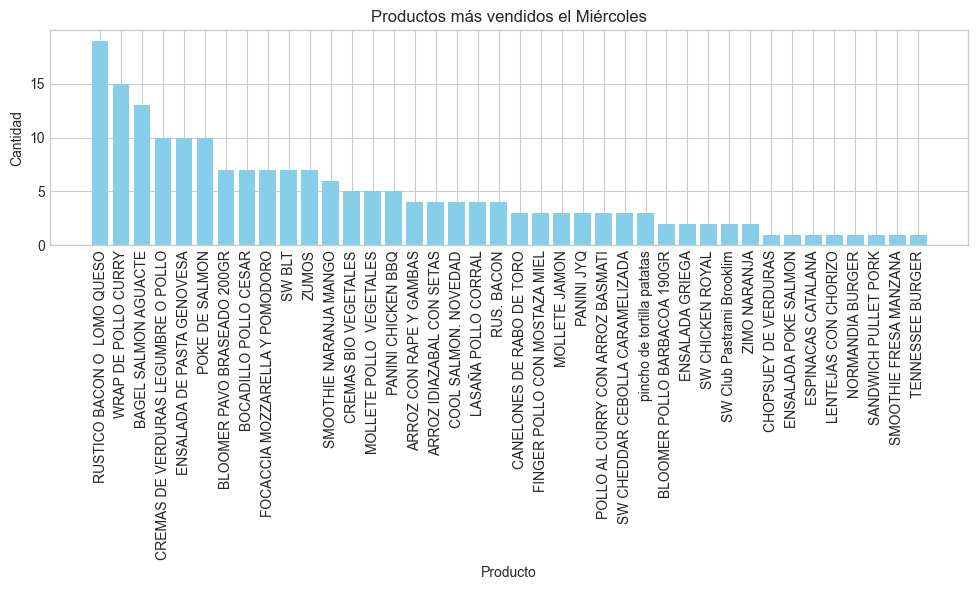

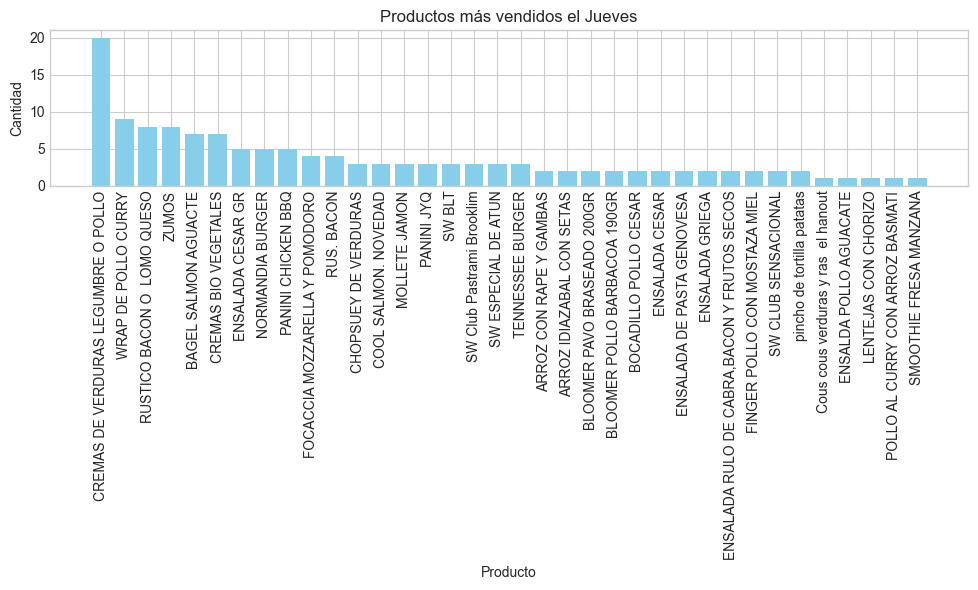

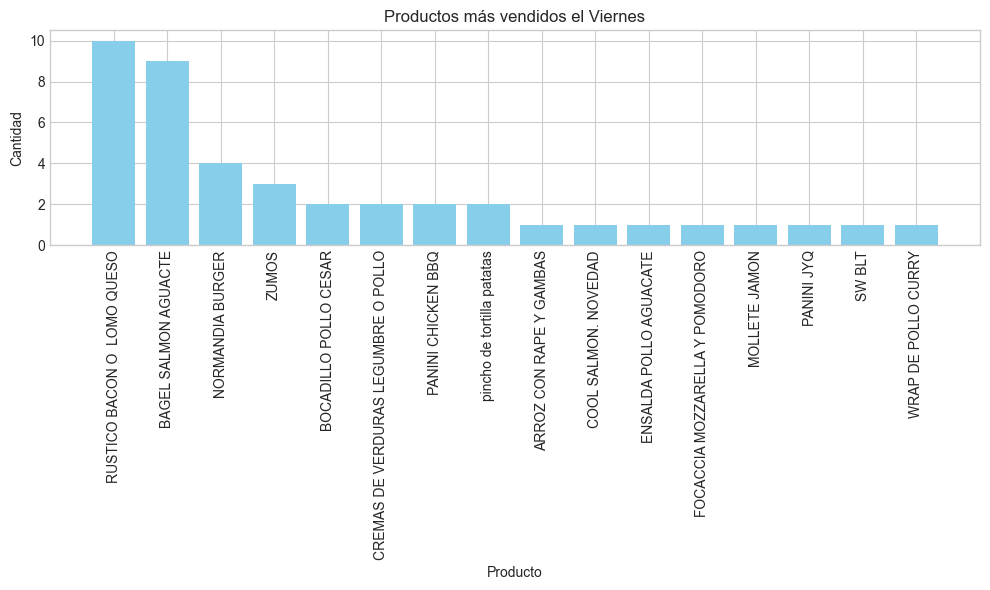

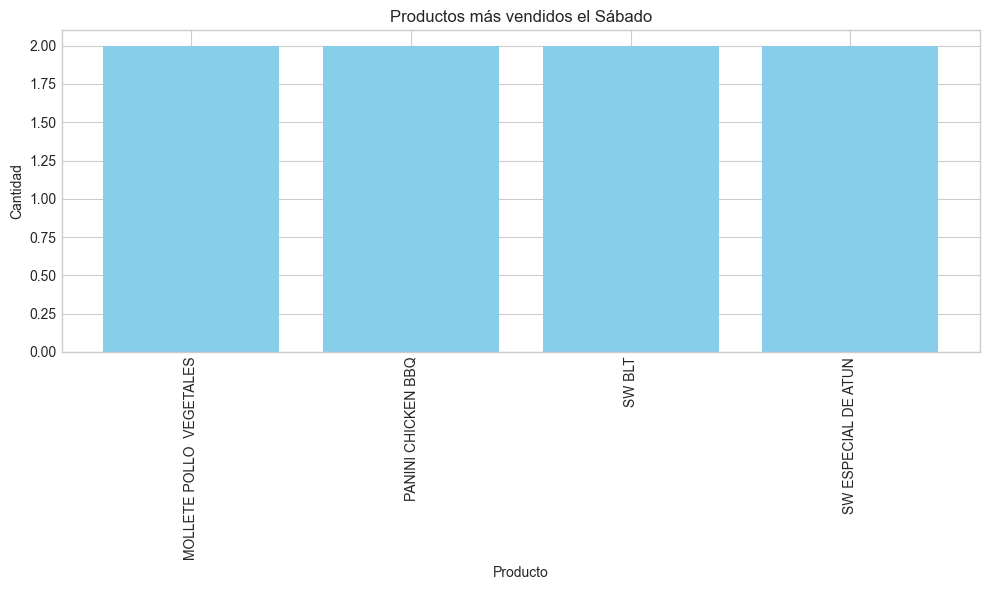

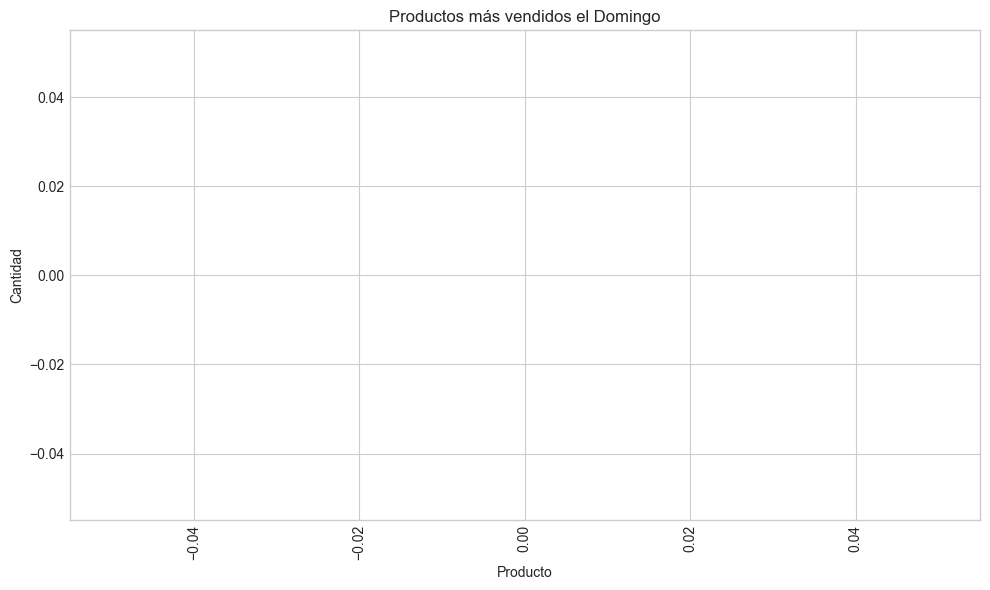

In [276]:
vitrinas['Date'] = pd.to_datetime(vitrinas['Date'], format='%d/%m/%Y %H:%M:%S')

vitrinas['Dia_Semana'] = vitrinas['Date'].dt.dayofweek
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
vitrinas['Nombre_Dia'] = vitrinas['Dia_Semana'].apply(lambda x: nombres_dias_semana[x])


agrupado_por_dia_y_producto = vitrinas.groupby(['Nombre_Dia', 'Product']).size().reset_index(name='Cantidad')
agrupado_por_dia_y_producto = agrupado_por_dia_y_producto.sort_values(by=['Nombre_Dia', 'Cantidad'], ascending=[True, False])

productos_mas_vendidos_por_dia = agrupado_por_dia_y_producto.groupby('Nombre_Dia').first().reset_index()

for dia in nombres_dias_semana:
    productos_dia = agrupado_por_dia_y_producto[agrupado_por_dia_y_producto['Nombre_Dia'] == dia]
    
    plt.figure(figsize=(10, 6))
    plt.bar(productos_dia['Product'], productos_dia['Cantidad'], color='skyblue')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad')
    plt.title(f'Productos más vendidos el {dia}')
    plt.xticks(rotation=90)  
    plt.tight_layout()
    plt.show()

Vitrinas - Franjas Horarias

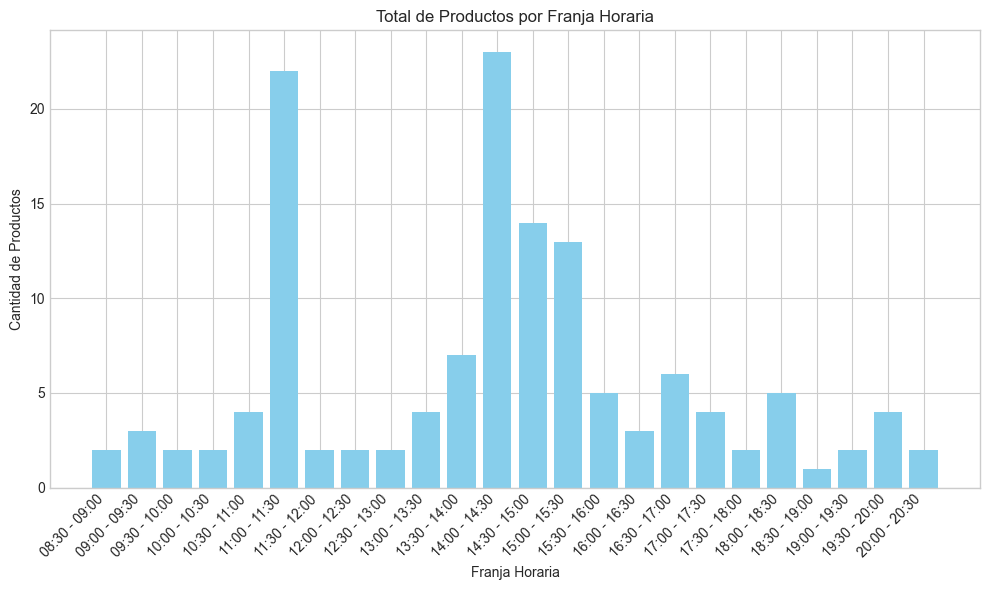

In [277]:
franjas_horarias = {
    '06:00 - 06:30': (6, 6.5),
    '06:30 - 07:00': (6.5, 7),
    '07:00 - 07:30': (7, 7.5),
    '07:30 - 08:00': (7.5, 8),
    '08:00 - 08:30': (8, 8.5),
    '08:30 - 09:00': (8.5, 9),
    '09:00 - 09:30': (9, 9.5),
    '09:30 - 10:00': (9.5, 10),
    '10:00 - 10:30': (10, 10.5),
    '10:30 - 11:00': (10.5, 11),
    '11:00 - 11:30': (11, 11.5),
    '11:30 - 12:00': (11.5, 12),
    '12:00 - 12:30': (12, 12.5),
    '12:30 - 13:00': (12.5, 13),
    '13:00 - 13:30': (13, 13.5),
    '13:30 - 14:00': (13.5, 14),
    '14:00 - 14:30': (14, 14.5),
    '14:30 - 15:00': (14.5, 15),
    '15:00 - 15:30': (15, 15.5),
    '15:30 - 16:00': (15.5, 16),
    '16:00 - 16:30': (16, 16.5),
    '16:30 - 17:00': (16.5, 17),
    '17:00 - 17:30': (17, 17.5),
    '17:30 - 18:00': (17.5, 18),
    '18:00 - 18:30': (18, 18.5),
    '18:30 - 19:00': (18.5, 19),
    '19:00 - 19:30': (19, 19.5),
    '19:30 - 20:00': (19.5, 20),
    '20:00 - 20:30': (20, 20.5),
    '20:30 - 21:00': (20.5, 21),
}

def asignar_franja_horaria(hora):
    for franja, (inicio, fin) in franjas_horarias.items():
        if inicio <= hora < fin:
            return franja
    return 'Otro'

vitrinas['Date'] = pd.to_datetime(vitrinas['Date'], format='%d/%m/%Y %H:%M:%S')
vitrinas['Franja Horaria'] = vitrinas['Date'].dt.hour + vitrinas['Date'].dt.minute / 60
vitrinas['Franja Horaria'] = vitrinas['Franja Horaria'].apply(asignar_franja_horaria)

agrupado_por_franja_y_producto = vitrinas.groupby(['Franja Horaria', 'Product']).size().reset_index(name='Cantidad')
agrupado_por_franja_y_producto = agrupado_por_franja_y_producto.sort_values(by='Franja Horaria', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(agrupado_por_franja_y_producto['Franja Horaria'], agrupado_por_franja_y_producto['Cantidad'], color='skyblue')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Productos')
plt.title('Total de Productos por Franja Horaria')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

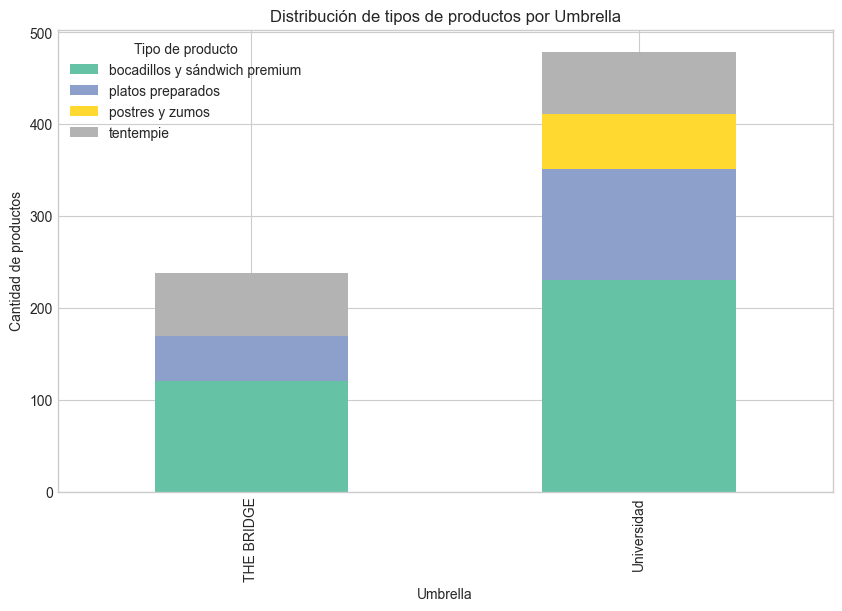

In [278]:
# Calculamos la frecuencia de cada tipo de producto para cada ID de cliente
productos_por_id = vitrinas.groupby(['Umbrella', 'Product Type']).size().unstack(fill_value=0)

# Procedimos a graficar las maquinas 120,121,122 por cada tipos de productos. 
colores = ['skyblue', 'lightgreen', 'gold', 'cyan']
productos_por_id.plot(kind='bar', colormap='Set2', stacked=True, figsize=(10, 6))
plt.title('Distribución de tipos de productos por Umbrella')
plt.xlabel('Umbrella')
plt.ylabel('Cantidad de productos')
plt.legend(title='Tipo de producto')
plt.show()

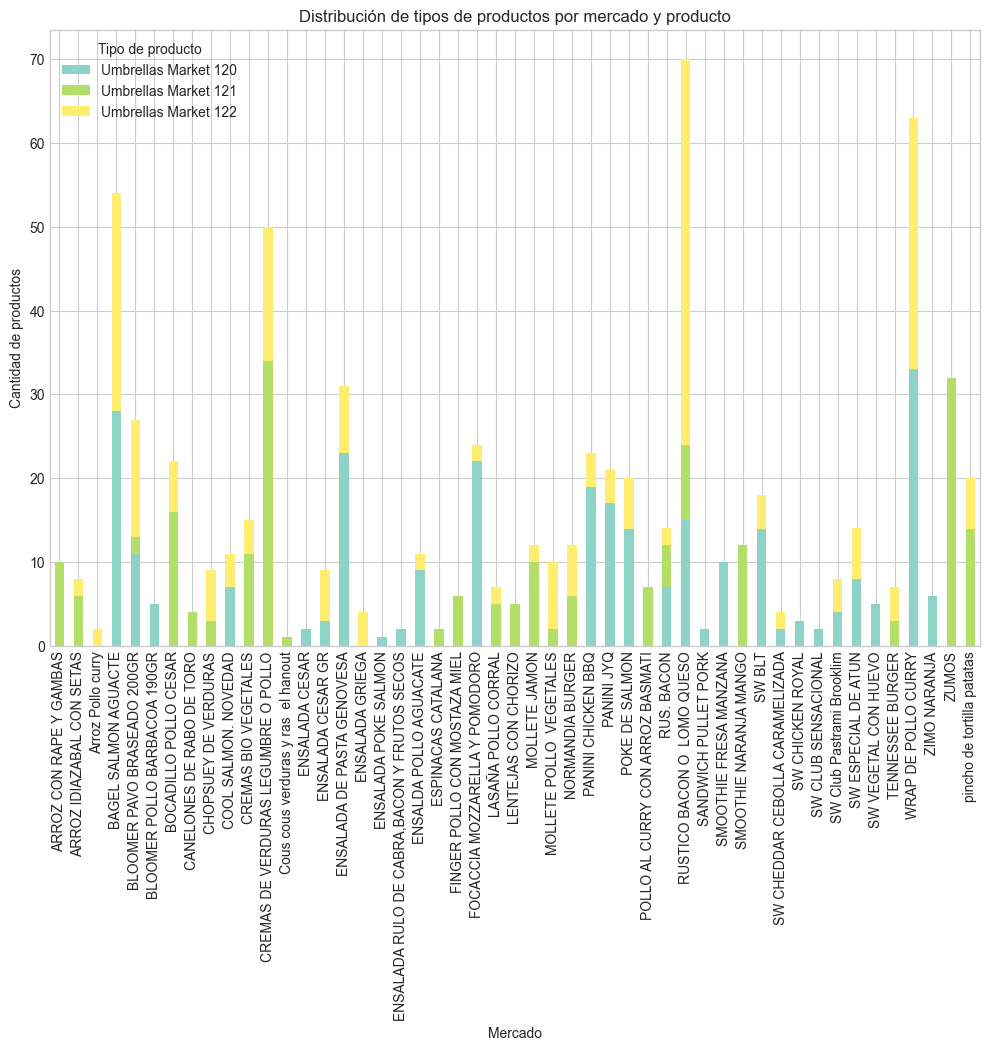

In [279]:
# Calcular la frecuencia de cada tipo de producto para cada mercado y producto
productos_por_mercado_producto = vitrinas.groupby(['Product','Market']).size().unstack(fill_value=0)

# Graficar
productos_por_mercado_producto.plot(kind='bar', colormap='Set3', stacked=True, figsize=(12, 8))

# Añadir título y etiquetas
plt.title('Distribución de tipos de productos por mercado y producto')
plt.xlabel('Mercado')
plt.ylabel('Cantidad de productos')
plt.legend(title='Tipo de producto')

# Mostrar el gráfico
plt.show()

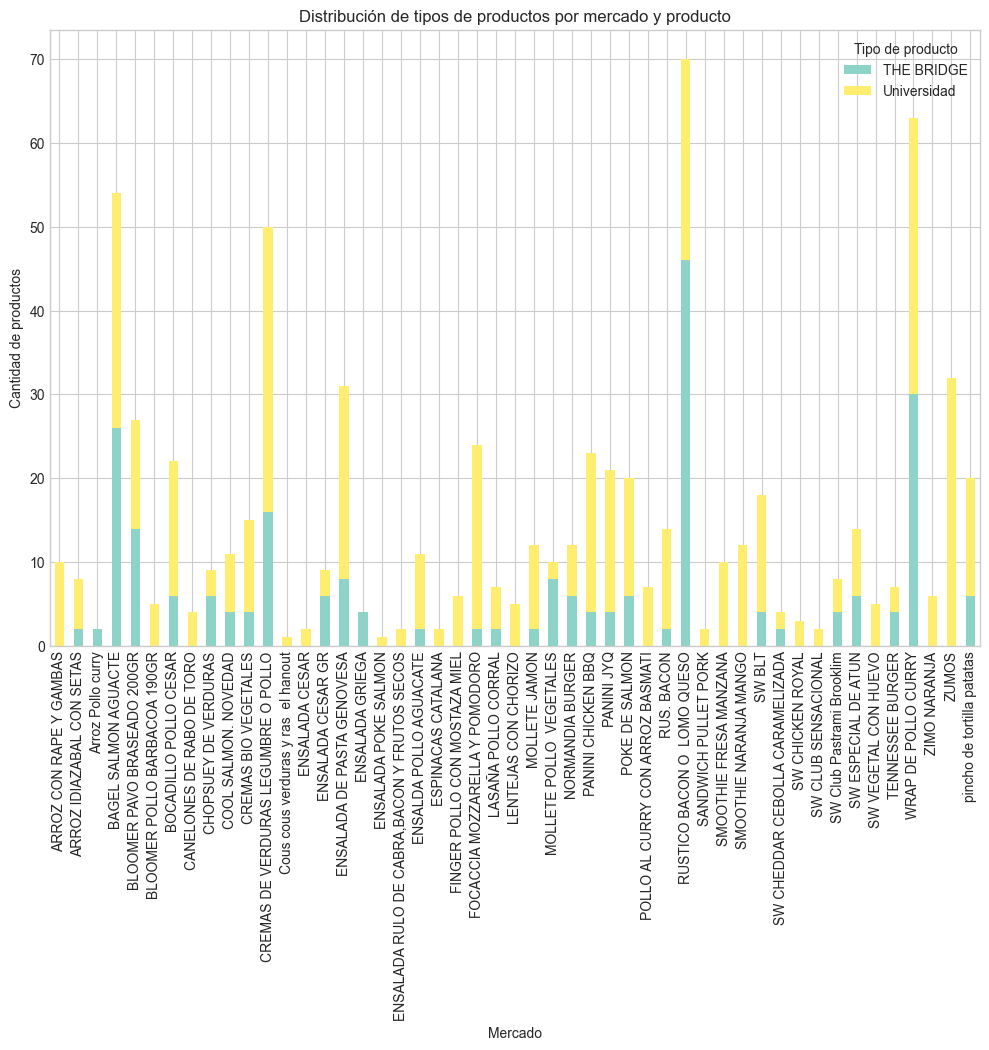

In [280]:
# Calcular la frecuencia de cada tipo de producto para cada mercado y producto
productos_por_mercado_producto = vitrinas.groupby(['Product','Umbrella']).size().unstack(fill_value=0)

# Graficar
productos_por_mercado_producto.plot(kind='bar', colormap='Set3', stacked=True, figsize=(12, 8))

# Añadir título y etiquetas
plt.title('Distribución de tipos de productos por mercado y producto')
plt.xlabel('Mercado')
plt.ylabel('Cantidad de productos')
plt.legend(title='Tipo de producto')

# Mostrar el gráfico
plt.show()

## Ventas Vending

In [281]:
# Ruta del directorio 
directorio_destino = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos'

# Ruta del archivo Excel
ruta_archivo_excel = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos\datos maquina de vending.xlsx'


# Cargar el archivo Excel en un DataFrame, omitiendo la primera fila
vending = pd.read_excel(ruta_archivo_excel, header=1)

# Mostrar el DataFrame
print(vending)

     ID Servidor  ID Transacción  ID modo de pago Moneda  Descripción Actor  \
0            6.0    6.571832e+09              1.0    EUR  THE BRIDGE SCHOOL   
1            6.0    6.571292e+09              1.0    EUR  THE BRIDGE SCHOOL   
2            6.0    6.571284e+09              1.0    EUR  THE BRIDGE SCHOOL   
3            6.0    6.571107e+09              1.0    EUR  THE BRIDGE SCHOOL   
4            6.0    6.570006e+09              1.0    EUR  THE BRIDGE SCHOOL   
..           ...             ...              ...    ...                ...   
695          6.0    6.017843e+09              1.0    EUR  THE BRIDGE SCHOOL   
696          6.0    6.017588e+09              1.0    EUR  THE BRIDGE SCHOOL   
697          6.0    6.017259e+09              1.0    EUR  THE BRIDGE SCHOOL   
698          6.0    6.016445e+09              1.0    EUR  THE BRIDGE SCHOOL   
699          NaN             NaN              NaN  Total                NaN   

              Nombre máquina Payment Method (Source

In [282]:
vending.shape

(700, 13)

In [283]:
vending["Producto"].unique()

array(['Mios maiz(19  1.20)', 'COCA COLA ZERO LATA 33CL(63  1.50)',
       'ALMENDRA(23  1.30)', 'barra cereales natura valley(25  1.15)',
       'MILKA BEBIBLE(67  1.50)', 'BIFRUTAS(45  1.30)',
       'MILKA LU(37  1.30)', 'AGUA(51  0.90)',
       'COCA COLA PET 0,5L(55  1.80)', 'platanitos goya(13  1.50)',
       'MONSTERS SIN BLANCO(56  1.80)',
       'COCA COLA PET ZERO 0,5L(54  1.80)', 'ELGORRIAGA(20  1.30)',
       'KIDER BOLLO(33  1.30)', 'AGUA(52  0.90)',
       'COCA COLA LATA 33CL(62  1.50)', 'RISKETOS(43  1.20)',
       'BRIOTE JAMO QUESO(65  1.80)',
       'CHOCO BOM BLANCHO (ENVASE AZÚL)(44  1.30)',
       'rufles jamon(17  1.20)', 'BIFRUTAS(46  1.30)',
       'COLA CAO (68  1.50)', 'KINDER BUENO(32  1.30)', 'HUMUS(64  1.90)',
       'RED BULL(59  2.00)', 'MONSTER (58  2.20)', 'ELGORRIAGA(30  1.30)',
       'MAHOU(69  1.60)', 'COCA COLA  PET ZERO ZERO(53  0.90)',
       'ALOEVERA(49  1.80)', 'NATWINS YOUGUR  Y CHOCOLATE(47  1.50)',
       'MIOS HORNEADOS(41  1.20)', 'AQUAR

In [284]:
vending.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID Servidor                      699 non-null    float64
 1   ID Transacción                   699 non-null    float64
 2   ID modo de pago                  699 non-null    float64
 3   Moneda                           700 non-null    object 
 4   Descripción Actor                699 non-null    object 
 5   Nombre máquina                   699 non-null    object 
 6   Payment Method (Source)          699 non-null    object 
 7   ID Operador                      699 non-null    float64
 8   Valor autorización               700 non-null    float64
 9   Valor cierre                     700 non-null    float64
 10  Producto                         699 non-null    object 
 11  Hora autorización de la máquina  699 non-null    object 
 12  Machine Settlment Time

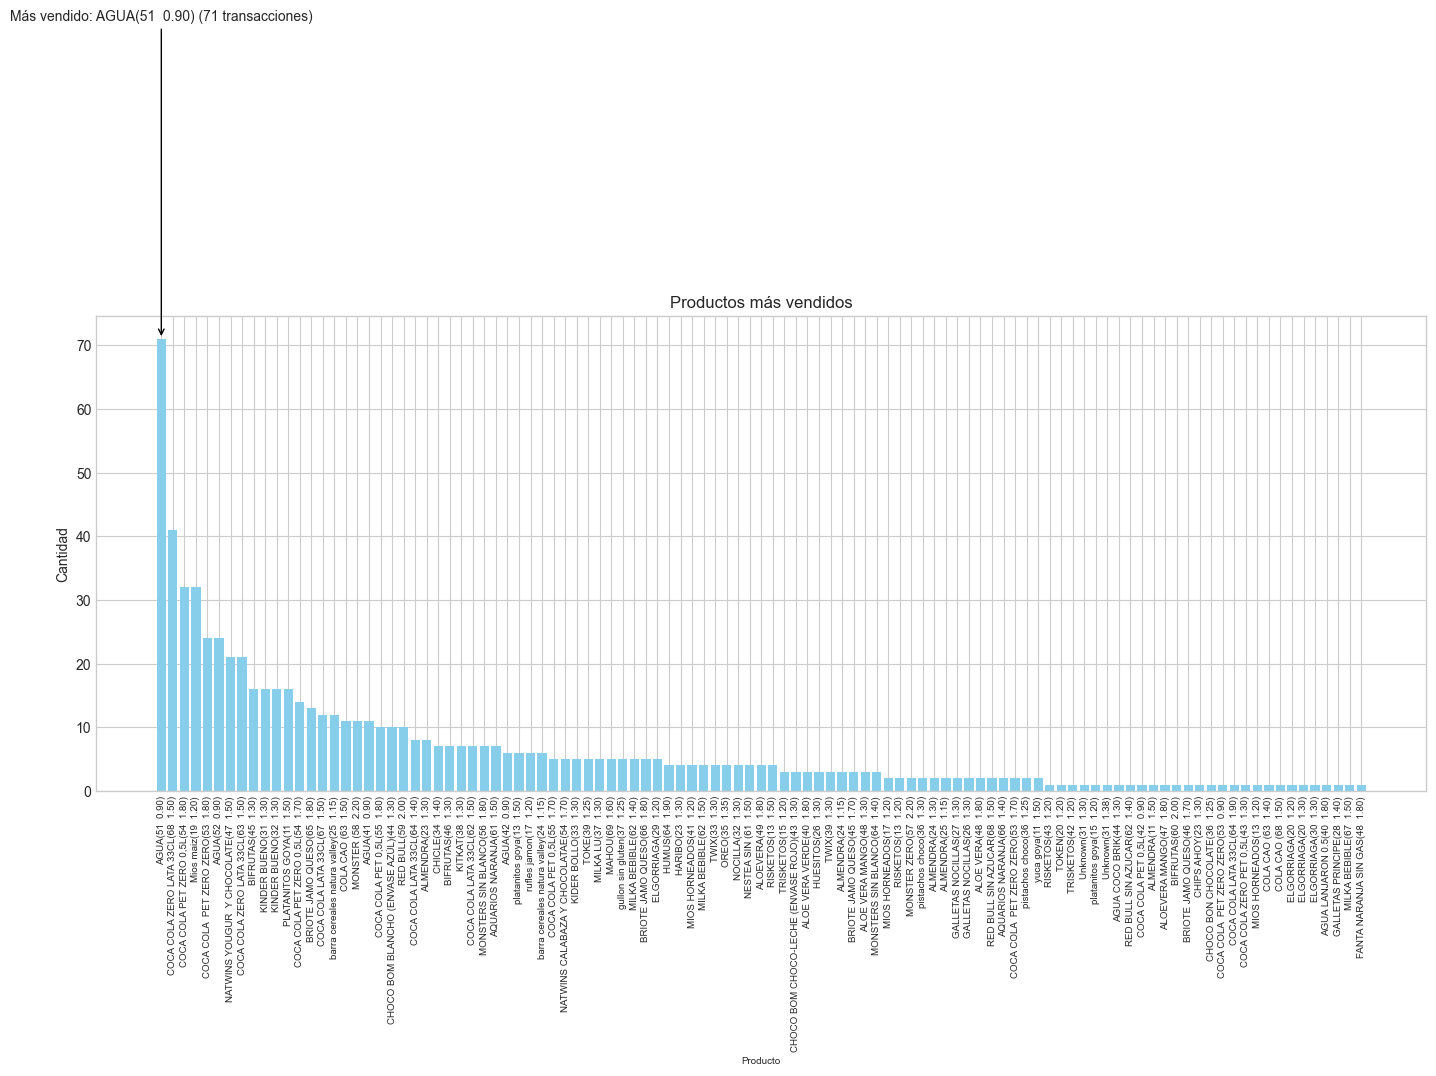

In [285]:
agrupado_por_producto = vending.groupby('Producto').size().reset_index(name='Cantidad')

agrupado_por_producto = agrupado_por_producto.sort_values(by='Cantidad', ascending=False)

producto_mas_vendido = agrupado_por_producto.iloc[0]['Producto']
cantidad_producto_mas_vendido = agrupado_por_producto.iloc[0]['Cantidad']


plt.figure(figsize=(14, 8))
plt.bar(agrupado_por_producto['Producto'], agrupado_por_producto['Cantidad'], color='skyblue')
plt.xlabel('Producto', fontsize=7)
plt.ylabel('Cantidad')
plt.title('Productos más vendidos')
plt.xticks(rotation=90, fontsize=7)  
plt.tight_layout()

#Indicamos el más vendido
plt.annotate(f'Más vendido: {producto_mas_vendido} ({cantidad_producto_mas_vendido} transacciones)',
             xy=(producto_mas_vendido, cantidad_producto_mas_vendido),
             xytext=(producto_mas_vendido, cantidad_producto_mas_vendido + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

plt.show()

In [286]:
vending['Hora autorización de la máquina'] = pd.to_datetime(vending['Hora autorización de la máquina'], format='%d/%m/%Y %H:%M:%S')
vending['Mes'] = vending['Hora autorización de la máquina'].dt.month

agrupado_por_mes_y_producto = vending.groupby(['Mes', 'Producto']).size().reset_index(name='Cantidad')

agrupado_por_mes_y_producto = agrupado_por_mes_y_producto.sort_values(by=['Mes', 'Cantidad'], ascending=[True, False])

productos_mas_vendidos_por_mes = agrupado_por_mes_y_producto.groupby('Mes').first().reset_index()

print(productos_mas_vendidos_por_mes)

    Mes                                 Producto  Cantidad
0   1.0                      Mios maiz(19  1.20)        15
1   2.0                           AGUA(51  0.90)        57
2   3.0       COCA COLA ZERO LATA 33CL(63  1.50)        17
3  12.0  NATWINS CALABAZA Y CHOCOLATAE(54  1.70)         3


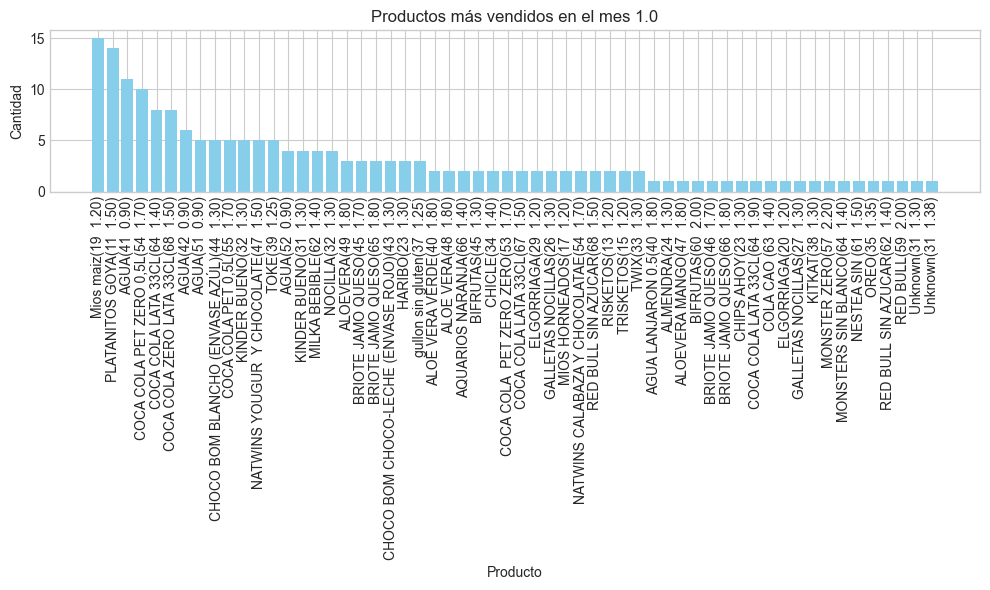

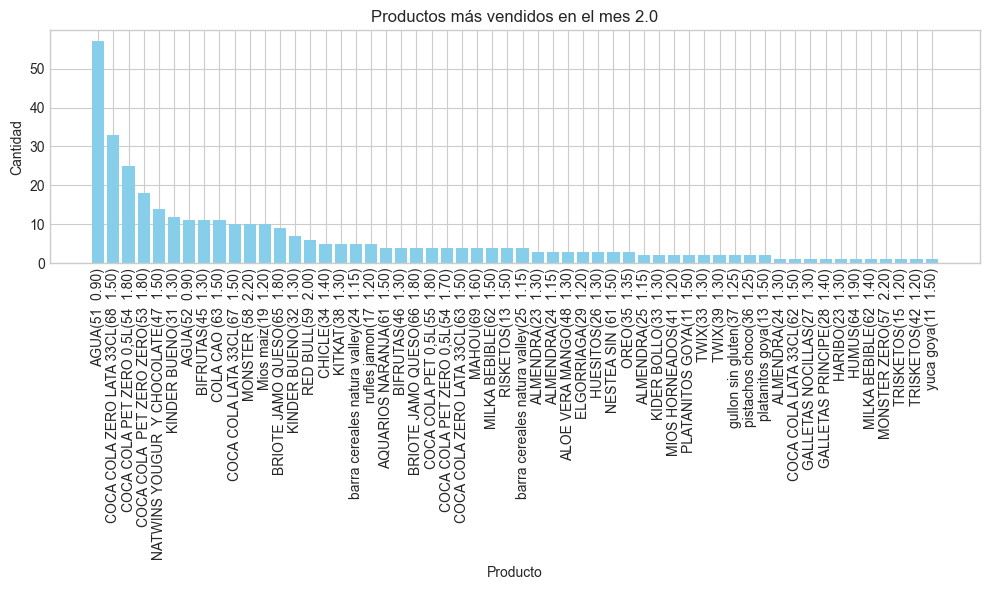

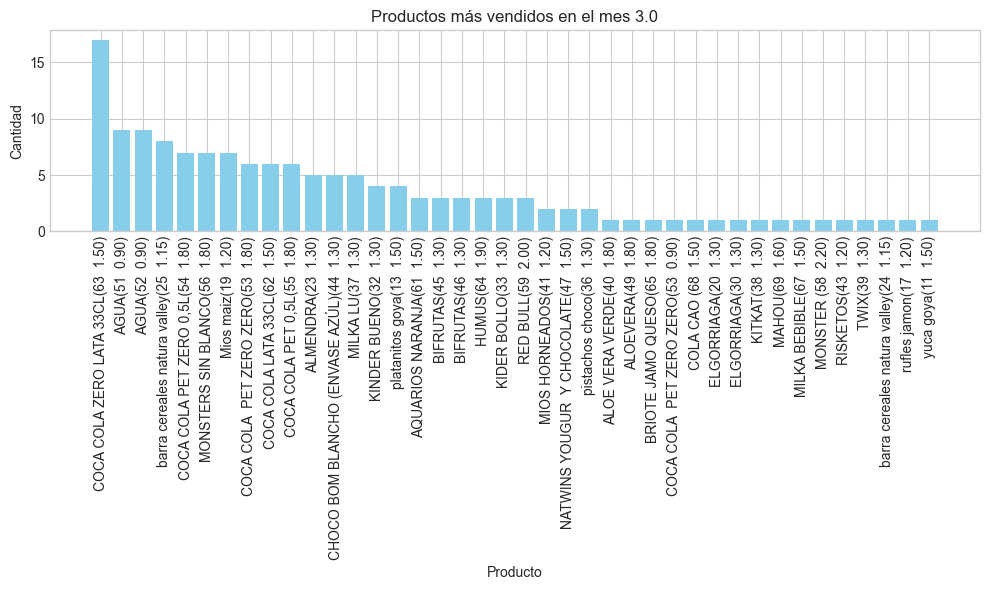

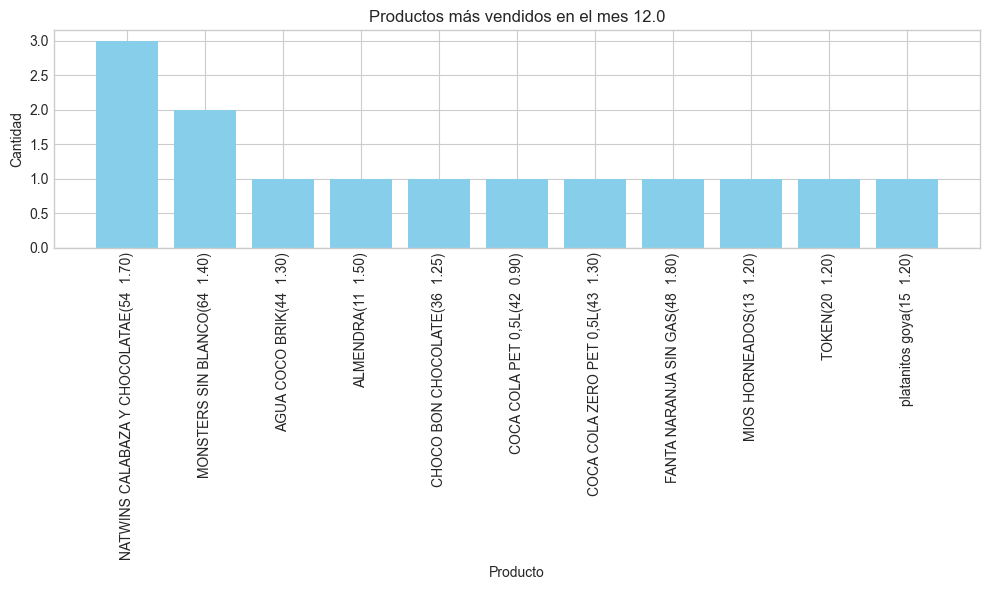

In [287]:
meses_unicos = agrupado_por_mes_y_producto['Mes'].unique()

for mes in meses_unicos:
    datos_mes = agrupado_por_mes_y_producto[agrupado_por_mes_y_producto['Mes'] == mes]
    
    plt.figure(figsize=(10, 6))
    plt.bar(datos_mes['Producto'], datos_mes['Cantidad'], color='skyblue')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad')
    plt.title(f'Productos más vendidos en el mes {mes}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    plt.show()  

Vending - Franjas Horarias

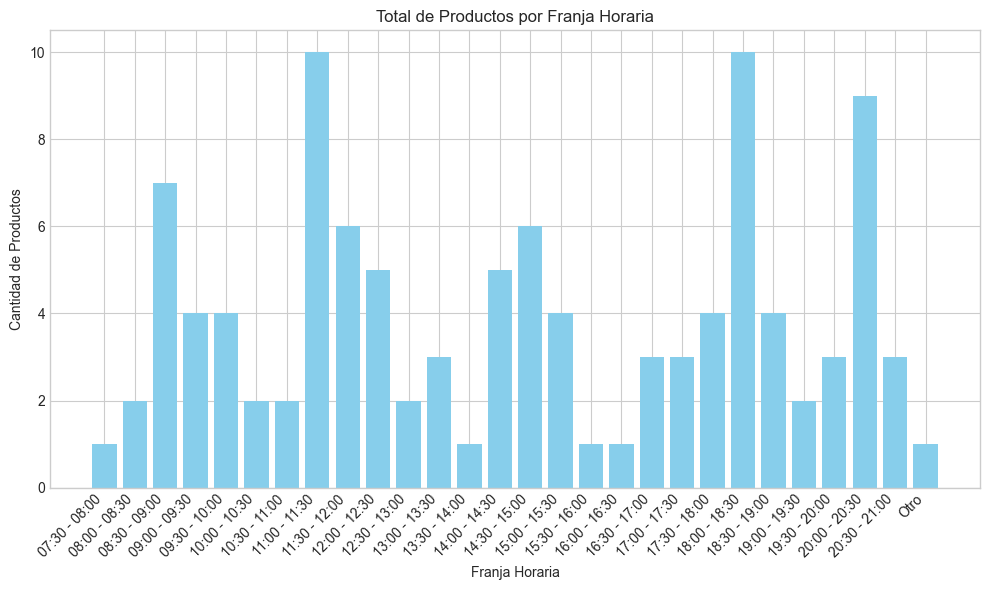

In [288]:
franjas_horarias = {
    '06:00 - 06:30': (6, 6.5),
    '06:30 - 07:00': (6.5, 7),
    '07:00 - 07:30': (7, 7.5),
    '07:30 - 08:00': (7.5, 8),
    '08:00 - 08:30': (8, 8.5),
    '08:30 - 09:00': (8.5, 9),
    '09:00 - 09:30': (9, 9.5),
    '09:30 - 10:00': (9.5, 10),
    '10:00 - 10:30': (10, 10.5),
    '10:30 - 11:00': (10.5, 11),
    '11:00 - 11:30': (11, 11.5),
    '11:30 - 12:00': (11.5, 12),
    '12:00 - 12:30': (12, 12.5),
    '12:30 - 13:00': (12.5, 13),
    '13:00 - 13:30': (13, 13.5),
    '13:30 - 14:00': (13.5, 14),
    '14:00 - 14:30': (14, 14.5),
    '14:30 - 15:00': (14.5, 15),
    '15:00 - 15:30': (15, 15.5),
    '15:30 - 16:00': (15.5, 16),
    '16:00 - 16:30': (16, 16.5),
    '16:30 - 17:00': (16.5, 17),
    '17:00 - 17:30': (17, 17.5),
    '17:30 - 18:00': (17.5, 18),
    '18:00 - 18:30': (18, 18.5),
    '18:30 - 19:00': (18.5, 19),
    '19:00 - 19:30': (19, 19.5),
    '19:30 - 20:00': (19.5, 20),
    '20:00 - 20:30': (20, 20.5),
    '20:30 - 21:00': (20.5, 21),
}

def asignar_franja_horaria(hora):
    for franja, (inicio, fin) in franjas_horarias.items():
        if inicio <= hora < fin:
            return franja
    return 'Otro'

vending['Franja Horaria'] = vending['Hora autorización de la máquina'].dt.hour + vending['Hora autorización de la máquina'].dt.minute / 60
vending['Franja Horaria'] = vending['Franja Horaria'].apply(asignar_franja_horaria)

agrupado_por_franja_y_producto = vending.groupby(['Franja Horaria', 'Producto']).size().reset_index(name='Cantidad')
agrupado_por_franja_y_producto = agrupado_por_franja_y_producto.sort_values(by='Franja Horaria', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(agrupado_por_franja_y_producto['Franja Horaria'], agrupado_por_franja_y_producto['Cantidad'], color='skyblue')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Productos')
plt.title('Total de Productos por Franja Horaria')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [289]:
vending['Machine Settlment Time'] = pd.to_datetime(vending['Machine Settlment Time'], format='%d/%m/%Y %H:%M:%S')

In [290]:
vending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID Servidor                      699 non-null    float64       
 1   ID Transacción                   699 non-null    float64       
 2   ID modo de pago                  699 non-null    float64       
 3   Moneda                           700 non-null    object        
 4   Descripción Actor                699 non-null    object        
 5   Nombre máquina                   699 non-null    object        
 6   Payment Method (Source)          699 non-null    object        
 7   ID Operador                      699 non-null    float64       
 8   Valor autorización               700 non-null    float64       
 9   Valor cierre                     700 non-null    float64       
 10  Producto                         699 non-null    object       

EDA Venta Vending 

## Ventas Maquina de Café

In [291]:
# Ruta del archivo Excel
ruta_archivo_excel = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\Desafio\Carga de datos\Informe_movimientos maquina de cafe.xlsx'

# Cargar el archivo Excel en un DataFrame
mcafe = pd.read_excel(ruta_archivo_excel)

# Mostrar el DataFrame
print(mcafe)

                                 Fecha Tipo operación ID impreso tarjeta  \
0     Centro:  102 - THE BRIDGE SCHOOL            NaN                NaN   
1       PDV:  1823 - The Bridge School            NaN                NaN   
2           2024-01-15 15:05:44.601000       Venta CC                NaN   
3           2024-01-15 17:27:38.875000       Venta CC                NaN   
4           2024-01-15 17:53:10.143000       Venta CC                NaN   
...                                ...            ...                ...   
1493        2024-03-12 11:51:40.601000  Venta APP/NFC                249   
1494        2024-03-12 14:37:44.327000       Venta CC                NaN   
1495        2024-03-12 15:02:08.223000       Venta CC                NaN   
1496        2024-03-12 16:30:52.833000  Venta APP/NFC                  7   
1497        2024-03-12 16:36:17.536000  Venta APP/NFC                248   

             Tarjeta  Importe  Línea              Producto  Email  
0                Na

In [292]:
# Eliminar las dos primeras filas
mcafe = mcafe.iloc[2:]

# Mostrar el resultado
print(mcafe)

                           Fecha Tipo operación ID impreso tarjeta  \
2     2024-01-15 15:05:44.601000       Venta CC                NaN   
3     2024-01-15 17:27:38.875000       Venta CC                NaN   
4     2024-01-15 17:53:10.143000       Venta CC                NaN   
5     2024-01-15 18:22:42.142000       Venta CC                NaN   
6     2024-01-16 08:49:32.636000       Venta CC                NaN   
...                          ...            ...                ...   
1493  2024-03-12 11:51:40.601000  Venta APP/NFC                249   
1494  2024-03-12 14:37:44.327000       Venta CC                NaN   
1495  2024-03-12 15:02:08.223000       Venta CC                NaN   
1496  2024-03-12 16:30:52.833000  Venta APP/NFC                  7   
1497  2024-03-12 16:36:17.536000  Venta APP/NFC                248   

             Tarjeta  Importe  Línea              Producto  Email  
2                NaN     1.35    4.0                   NaN    NaN  
3                NaN   

In [293]:
mcafe.shape

(1496, 8)

In [294]:
mcafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 2 to 1497
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fecha               1496 non-null   object 
 1   Tipo operación      1496 non-null   object 
 2   ID impreso tarjeta  911 non-null    object 
 3   Tarjeta             924 non-null    object 
 4   Importe             1496 non-null   float64
 5   Línea               1496 non-null   float64
 6   Producto            1494 non-null   object 
 7   Email               0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 93.6+ KB


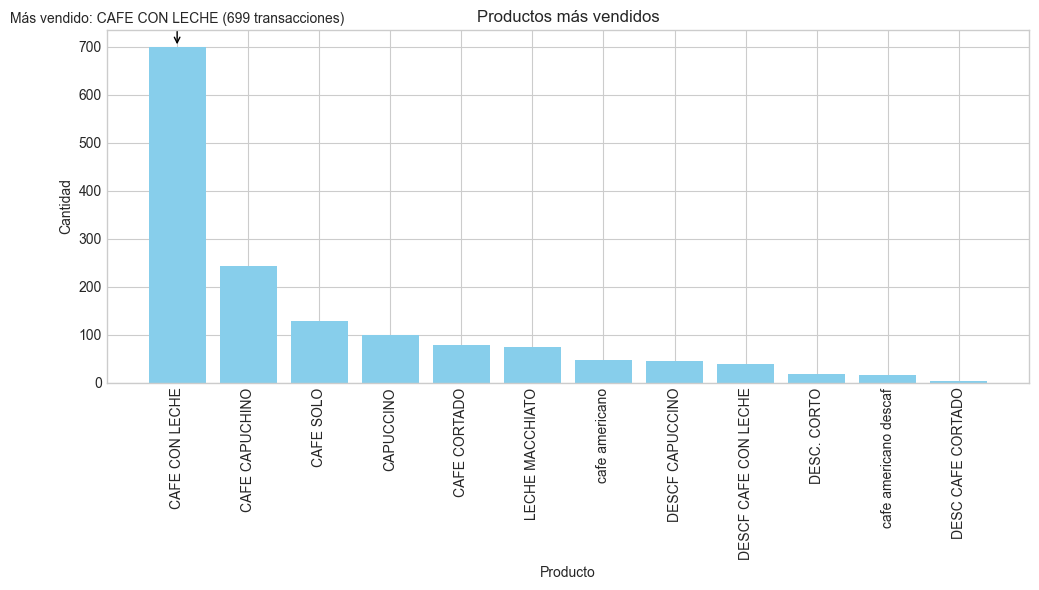

In [295]:
agrupado_por_producto = mcafe.groupby('Producto').size().reset_index(name='Cantidad')

agrupado_por_producto = agrupado_por_producto.sort_values(by='Cantidad', ascending=False)

producto_mas_vendido = agrupado_por_producto.iloc[0]['Producto']
cantidad_producto_mas_vendido = agrupado_por_producto.iloc[0]['Cantidad']

plt.figure(figsize=(10, 6))
plt.bar(agrupado_por_producto['Producto'], agrupado_por_producto['Cantidad'], color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.title('Productos más vendidos')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.annotate(f'Más vendido: {producto_mas_vendido} ({cantidad_producto_mas_vendido} transacciones)',
             xy=(producto_mas_vendido, cantidad_producto_mas_vendido),
             xytext=(producto_mas_vendido, cantidad_producto_mas_vendido + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')
plt.show()

In [296]:
mcafe['Fecha'] = pd.to_datetime(mcafe['Fecha'])
mcafe['Mes'] = mcafe['Fecha'].dt.month

agrupado_por_mes_y_producto = mcafe.groupby(['Mes', 'Producto']).size().reset_index(name='Cantidad')
agrupado_por_mes_y_producto = agrupado_por_mes_y_producto.sort_values(by=['Mes', 'Cantidad'], ascending=[True, False])

# Obtener el producto más vendido por mes
productos_mas_vendidos_por_mes = agrupado_por_mes_y_producto.groupby('Mes').first().reset_index()

# Visualizar los productos más vendidos por mes
print(productos_mas_vendidos_por_mes)

   Mes        Producto  Cantidad
0    1  CAFE CON LECHE       138
1    2  CAFE CON LECHE       406
2    3  CAFE CON LECHE       155


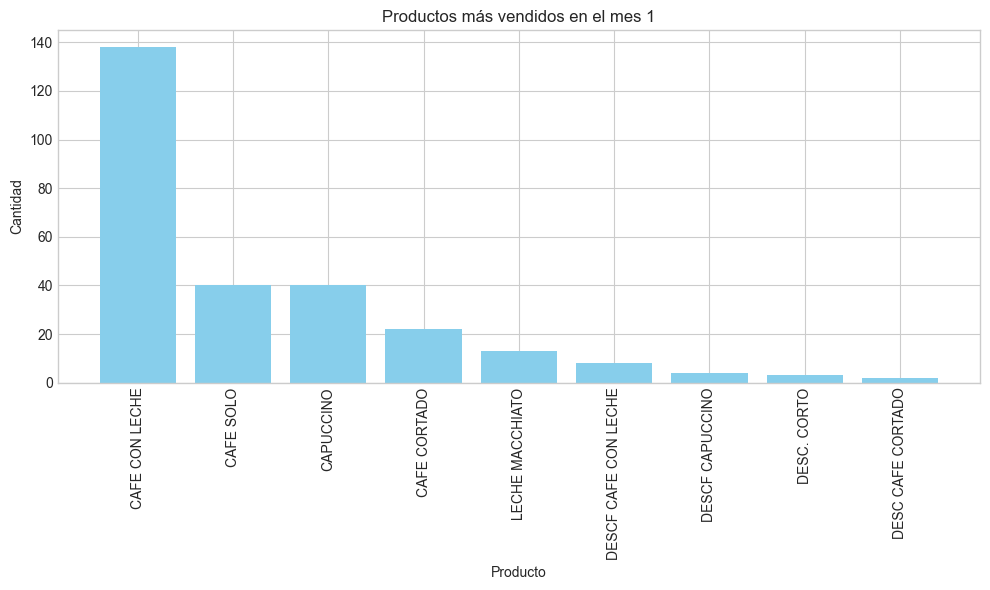

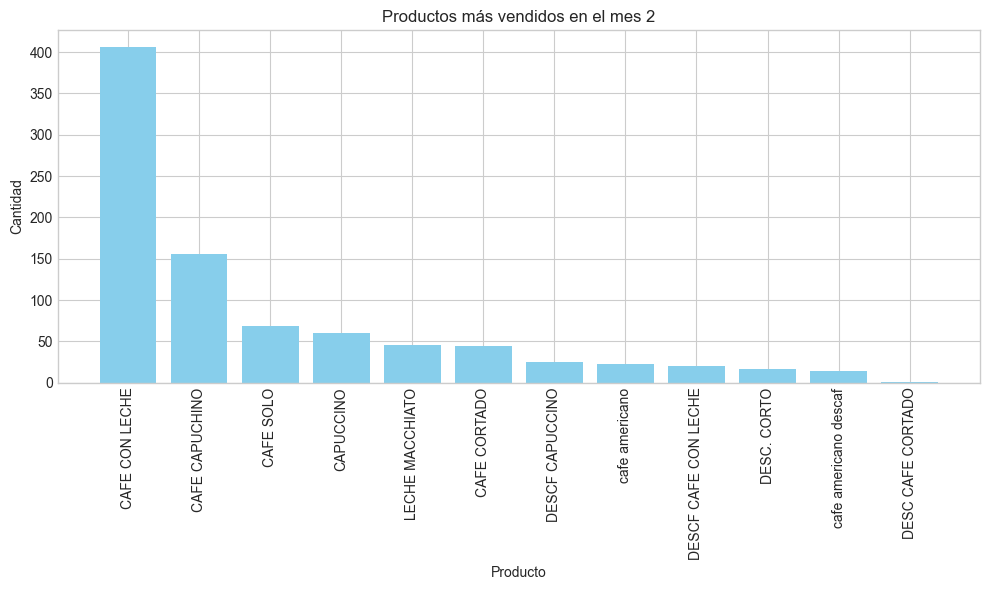

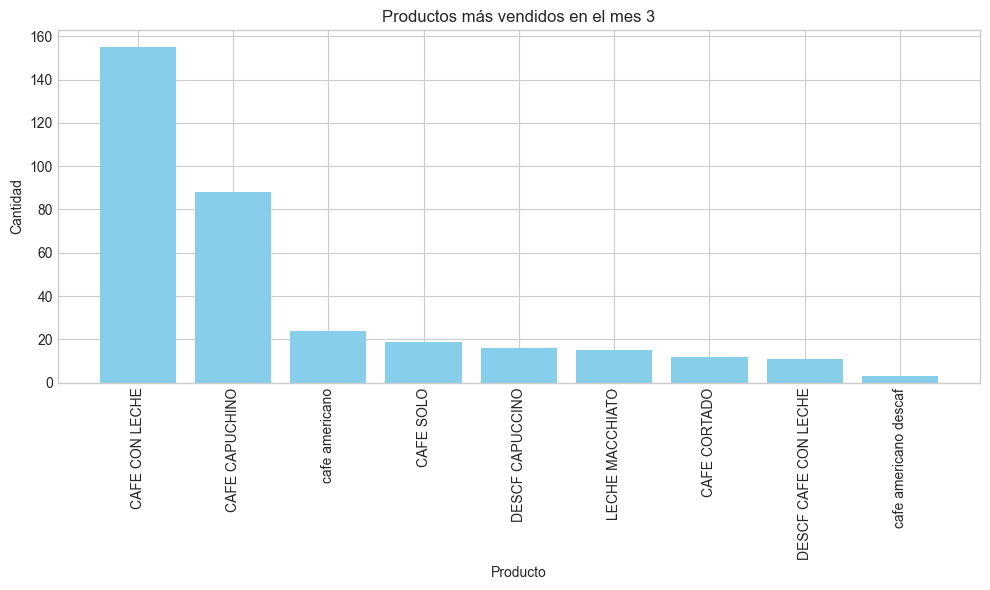

In [297]:
meses_unicos = agrupado_por_mes_y_producto['Mes'].unique()

for mes in meses_unicos:
    datos_mes = agrupado_por_mes_y_producto[agrupado_por_mes_y_producto['Mes'] == mes]
    
    plt.figure(figsize=(10, 6))
    plt.bar(datos_mes['Producto'], datos_mes['Cantidad'], color='skyblue')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad')
    plt.title(f'Productos más vendidos en el mes {mes}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    plt.show()  

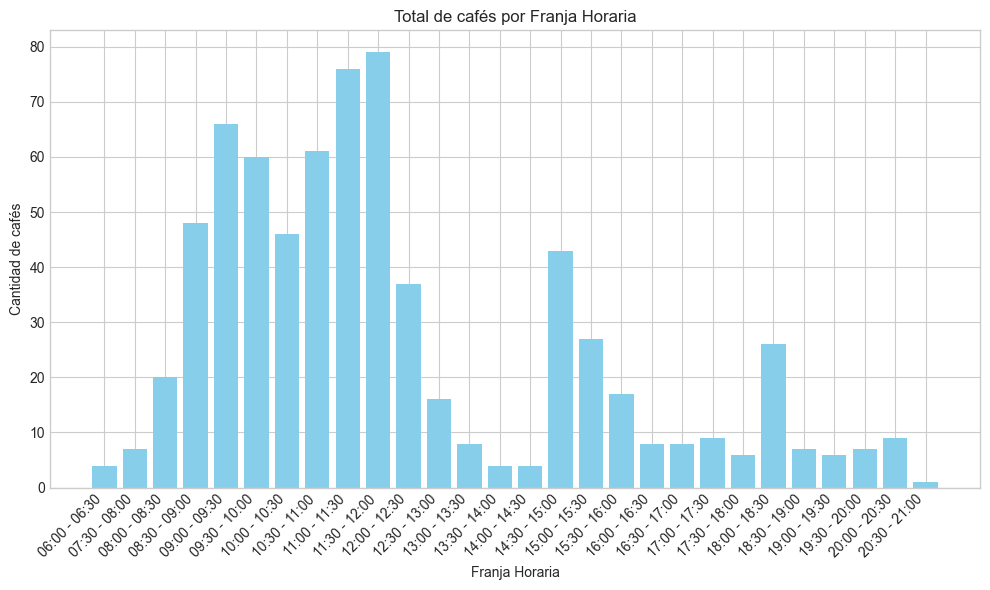

In [298]:
franjas_horarias = {
    '06:00 - 06:30': (6, 6.5),
    '06:30 - 07:00': (6.5, 7),
    '07:00 - 07:30': (7, 7.5),
    '07:30 - 08:00': (7.5, 8),
    '08:00 - 08:30': (8, 8.5),
    '08:30 - 09:00': (8.5, 9),
    '09:00 - 09:30': (9, 9.5),
    '09:30 - 10:00': (9.5, 10),
    '10:00 - 10:30': (10, 10.5),
    '10:30 - 11:00': (10.5, 11),
    '11:00 - 11:30': (11, 11.5),
    '11:30 - 12:00': (11.5, 12),
    '12:00 - 12:30': (12, 12.5),
    '12:30 - 13:00': (12.5, 13),
    '13:00 - 13:30': (13, 13.5),
    '13:30 - 14:00': (13.5, 14),
    '14:00 - 14:30': (14, 14.5),
    '14:30 - 15:00': (14.5, 15),
    '15:00 - 15:30': (15, 15.5),
    '15:30 - 16:00': (15.5, 16),
    '16:00 - 16:30': (16, 16.5),
    '16:30 - 17:00': (16.5, 17),
    '17:00 - 17:30': (17, 17.5),
    '17:30 - 18:00': (17.5, 18),
    '18:00 - 18:30': (18, 18.5),
    '18:30 - 19:00': (18.5, 19),
    '19:00 - 19:30': (19, 19.5),
    '19:30 - 20:00': (19.5, 20),
    '20:00 - 20:30': (20, 20.5),
    '20:30 - 21:00': (20.5, 21),
}

def asignar_franja_horaria(hora):
    for franja, (inicio, fin) in franjas_horarias.items():
        if inicio <= hora < fin:
            return franja
    return 'Otro'

mcafe['Fecha'] = pd.to_datetime(mcafe['Fecha'], format='%d/%m/%Y %H:%M:%S')
mcafe['Franja Horaria'] = mcafe['Fecha'].dt.hour + mcafe['Fecha'].dt.minute / 60
mcafe['Franja Horaria'] = mcafe['Franja Horaria'].apply(asignar_franja_horaria)

agrupado_por_franja_y_producto = mcafe.groupby(['Franja Horaria', 'Producto']).size().reset_index(name='Cantidad')
agrupado_por_franja_y_producto = agrupado_por_franja_y_producto.sort_values(by='Franja Horaria', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(agrupado_por_franja_y_producto['Franja Horaria'], agrupado_por_franja_y_producto['Cantidad'], color='skyblue')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de cafés')
plt.title('Total de cafés por Franja Horaria')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

C:\Users\fquin\AppData\Local\Temp\ipykernel_16764\2602254009.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(productos_unicos))


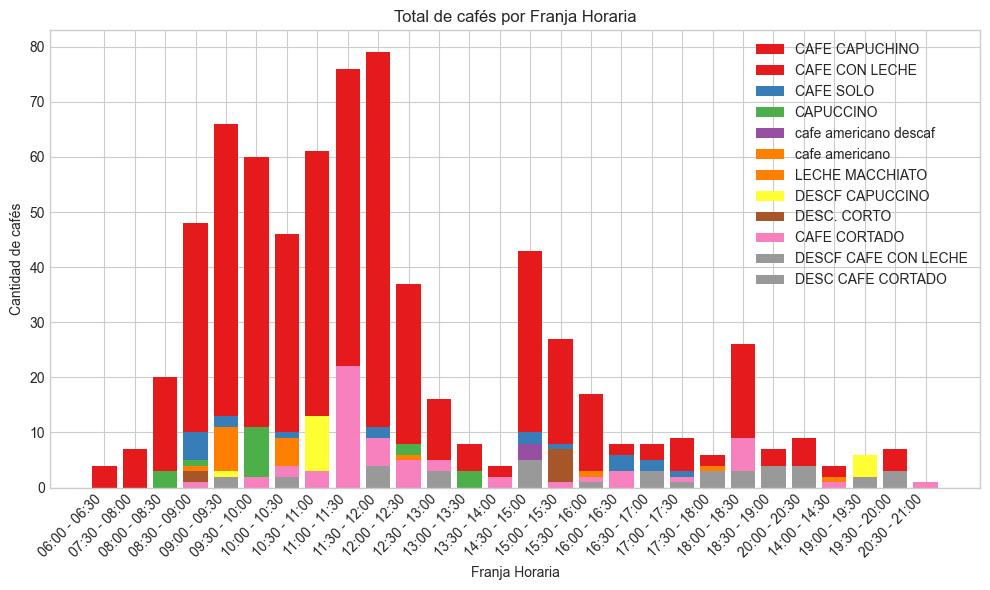

In [299]:
franjas_horarias = {
    '06:00 - 06:30': (6, 6.5),
    '06:30 - 07:00': (6.5, 7),
    '07:00 - 07:30': (7, 7.5),
    '07:30 - 08:00': (7.5, 8),
    '08:00 - 08:30': (8, 8.5),
    '08:30 - 09:00': (8.5, 9),
    '09:00 - 09:30': (9, 9.5),
    '09:30 - 10:00': (9.5, 10),
    '10:00 - 10:30': (10, 10.5),
    '10:30 - 11:00': (10.5, 11),
    '11:00 - 11:30': (11, 11.5),
    '11:30 - 12:00': (11.5, 12),
    '12:00 - 12:30': (12, 12.5),
    '12:30 - 13:00': (12.5, 13),
    '13:00 - 13:30': (13, 13.5),
    '13:30 - 14:00': (13.5, 14),
    '14:00 - 14:30': (14, 14.5),
    '14:30 - 15:00': (14.5, 15),
    '15:00 - 15:30': (15, 15.5),
    '15:30 - 16:00': (15.5, 16),
    '16:00 - 16:30': (16, 16.5),
    '16:30 - 17:00': (16.5, 17),
    '17:00 - 17:30': (17, 17.5),
    '17:30 - 18:00': (17.5, 18),
    '18:00 - 18:30': (18, 18.5),
    '18:30 - 19:00': (18.5, 19),
    '19:00 - 19:30': (19, 19.5),
    '19:30 - 20:00': (19.5, 20),
    '20:00 - 20:30': (20, 20.5),
    '20:30 - 21:00': (20.5, 21),
}

def asignar_franja_horaria(hora):
    for franja, (inicio, fin) in franjas_horarias.items():
        if inicio <= hora < fin:
            return franja
    return 'Otro'

mcafe['Fecha'] = pd.to_datetime(mcafe['Fecha'], format='%d/%m/%Y %H:%M:%S')
mcafe['Franja Horaria'] = mcafe['Fecha'].dt.hour + mcafe['Fecha'].dt.minute / 60
mcafe['Franja Horaria'] = mcafe['Franja Horaria'].apply(asignar_franja_horaria)

agrupado_por_franja_y_producto = mcafe.groupby(['Franja Horaria', 'Producto']).size().reset_index(name='Cantidad')
agrupado_por_franja_y_producto = agrupado_por_franja_y_producto.sort_values(by='Franja Horaria', ascending=True)

productos_unicos = agrupado_por_franja_y_producto['Producto'].unique()

colores = plt.cm.get_cmap('Set1', len(productos_unicos))

plt.figure(figsize=(10, 6))

for i, producto in enumerate(productos_unicos):
    datos_producto = agrupado_por_franja_y_producto[agrupado_por_franja_y_producto['Producto'] == producto]
    plt.bar(datos_producto['Franja Horaria'], datos_producto['Cantidad'], color=colores(i), label=producto)

plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de cafés')
plt.title('Total de cafés por Franja Horaria')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()

In [300]:
mcafe['Fecha'] = pd.to_datetime(mcafe['Fecha'], format='%d/%m/%Y %H:%M:%S')

In [301]:
mcafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 2 to 1497
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               1496 non-null   datetime64[ns]
 1   Tipo operación      1496 non-null   object        
 2   ID impreso tarjeta  911 non-null    object        
 3   Tarjeta             924 non-null    object        
 4   Importe             1496 non-null   float64       
 5   Línea               1496 non-null   float64       
 6   Producto            1494 non-null   object        
 7   Email               0 non-null      float64       
 8   Mes                 1496 non-null   int32         
 9   Franja Horaria      1496 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 111.2+ KB


In [302]:
mcafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 2 to 1497
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               1496 non-null   datetime64[ns]
 1   Tipo operación      1496 non-null   object        
 2   ID impreso tarjeta  911 non-null    object        
 3   Tarjeta             924 non-null    object        
 4   Importe             1496 non-null   float64       
 5   Línea               1496 non-null   float64       
 6   Producto            1494 non-null   object        
 7   Email               0 non-null      float64       
 8   Mes                 1496 non-null   int32         
 9   Franja Horaria      1496 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 111.2+ KB


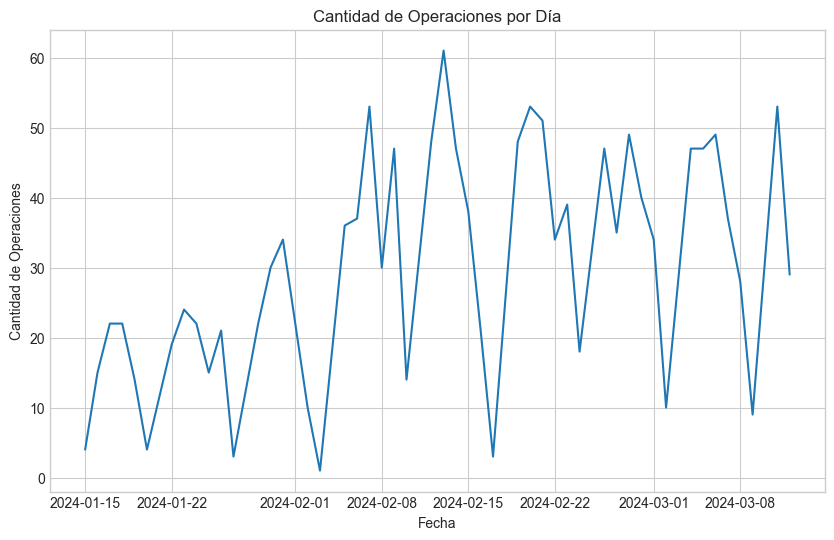

In [303]:
# Paso 1: Convertir la columna 'Fecha' a tipo datetime si no está en ese formato
mcafe['Fecha'] = pd.to_datetime(mcafe['Fecha'])

# Paso 2: Visualizar la cantidad de operaciones por día
operaciones_por_dia = mcafe.groupby(mcafe['Fecha'].dt.date).size()

plt.figure(figsize=(10, 6))
operaciones_por_dia.plot()
plt.title('Cantidad de Operaciones por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Operaciones')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

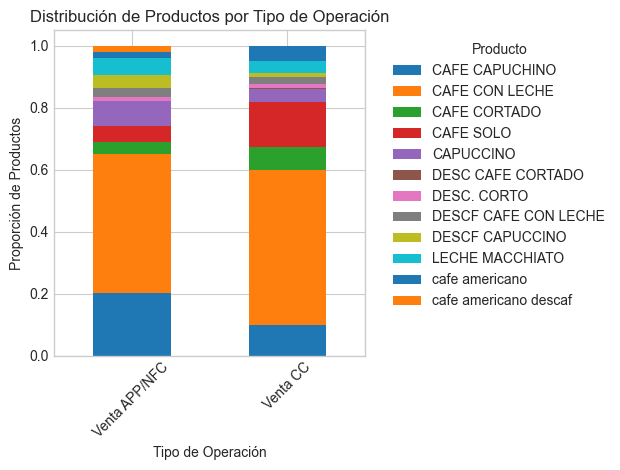

In [304]:
# Agrupar por tipo de operación y contar la frecuencia de cada producto
product_counts = mcafe.groupby(['Tipo operación', 'Producto']).size().unstack(fill_value=0)

# Normalizar los conteos para obtener la proporción de cada producto en cada tipo de operación
product_proportions = product_counts.div(product_counts.sum(axis=1), axis=0)

# Graficar la distribución de productos por tipo de operación
plt.figure(figsize=(12, 8))
product_proportions.plot(kind='bar', stacked=True)
plt.title('Distribución de Productos por Tipo de Operación')
plt.xlabel('Tipo de Operación')
plt.ylabel('Proporción de Productos')
plt.xticks(rotation=45)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

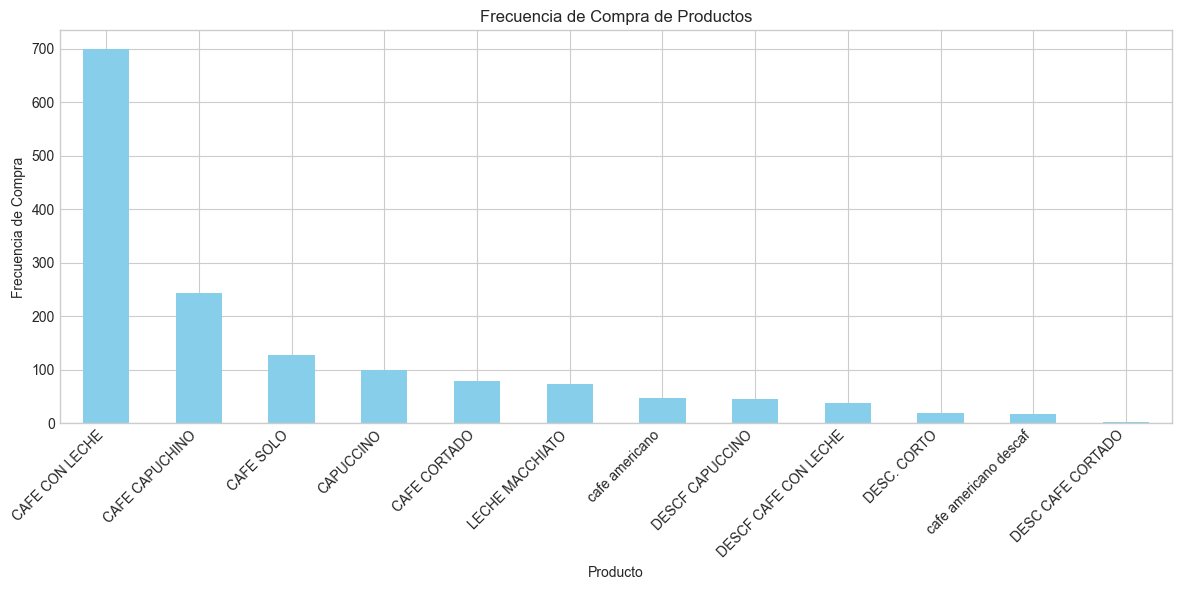

In [305]:
# Obtener la frecuencia de compra de cada producto
product_counts = mcafe['Producto'].value_counts()

# Graficar la frecuencia de compra de cada producto
plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Compra de Productos')
plt.xlabel('Producto')
plt.ylabel('Frecuencia de Compra')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [306]:
vending["Producto"].unique()

array(['Mios maiz(19  1.20)', 'COCA COLA ZERO LATA 33CL(63  1.50)',
       'ALMENDRA(23  1.30)', 'barra cereales natura valley(25  1.15)',
       'MILKA BEBIBLE(67  1.50)', 'BIFRUTAS(45  1.30)',
       'MILKA LU(37  1.30)', 'AGUA(51  0.90)',
       'COCA COLA PET 0,5L(55  1.80)', 'platanitos goya(13  1.50)',
       'MONSTERS SIN BLANCO(56  1.80)',
       'COCA COLA PET ZERO 0,5L(54  1.80)', 'ELGORRIAGA(20  1.30)',
       'KIDER BOLLO(33  1.30)', 'AGUA(52  0.90)',
       'COCA COLA LATA 33CL(62  1.50)', 'RISKETOS(43  1.20)',
       'BRIOTE JAMO QUESO(65  1.80)',
       'CHOCO BOM BLANCHO (ENVASE AZÚL)(44  1.30)',
       'rufles jamon(17  1.20)', 'BIFRUTAS(46  1.30)',
       'COLA CAO (68  1.50)', 'KINDER BUENO(32  1.30)', 'HUMUS(64  1.90)',
       'RED BULL(59  2.00)', 'MONSTER (58  2.20)', 'ELGORRIAGA(30  1.30)',
       'MAHOU(69  1.60)', 'COCA COLA  PET ZERO ZERO(53  0.90)',
       'ALOEVERA(49  1.80)', 'NATWINS YOUGUR  Y CHOCOLATE(47  1.50)',
       'MIOS HORNEADOS(41  1.20)', 'AQUAR

In [307]:
mcafe["Producto"].unique()

array([nan, 'CAFE CON LECHE', 'LECHE MACCHIATO', 'CAFE CORTADO',
       'CAPUCCINO', 'CAFE SOLO', 'DESC CAFE CORTADO', 'DESC. CORTO',
       'DESCF CAFE CON LECHE', 'DESCF CAPUCCINO', 'CAFE CAPUCHINO',
       'cafe americano', 'cafe americano descaf'], dtype=object)

In [308]:
vitrinas["Product"].unique()

array(['BOCADILLO POLLO CESAR', 'WRAP DE POLLO CURRY',
       'RUSTICO BACON O  LOMO QUESO', 'ENSALADA DE PASTA GENOVESA',
       'SMOOTHIE FRESA MANZANA', 'pincho de tortilla patatas',
       'SMOOTHIE NARANJA MANGO', 'FOCACCIA MOZZARELLA Y POMODORO',
       'BAGEL SALMON AGUACTE', 'BLOOMER PAVO BRASEADO 200GR',
       'PANINI CHICKEN BBQ', 'MOLLETE POLLO  VEGETALES', 'SW BLT',
       'NORMANDIA BURGER', 'BLOOMER POLLO BARBACOA 190GR',
       'ARROZ CON RAPE Y GAMBAS', 'FINGER POLLO CON MOSTAZA MIEL',
       'CREMAS DE VERDURAS LEGUMBRE O POLLO', 'ZUMOS', 'MOLLETE JAMON',
       'CANELONES DE RABO DE TORO', 'SW Club Pastrami Brooklim',
       'ARROZ IDIAZABAL CON SETAS', 'ENSALADA POKE SALMON',
       'SANDWICH PULLET PORK', 'PANINI JYQ', 'LASAÑA POLLO CORRAL',
       'POKE DE SALMON', 'SW CHEDDAR CEBOLLA CARAMELIZADA',
       'COOL SALMON. NOVEDAD', 'ENSALDA POLLO AGUACATE',
       'LENTEJAS CON CHORIZO', 'ENSALADA GRIEGA', 'CREMAS BIO VEGETALES',
       'ZIMO NARANJA', 'SW ESPECIAL 

## Modelo Propuesto

### Consolidacion de Datasets

Vitrina

In [309]:
vitrinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              717 non-null    int64         
 1   Status          717 non-null    object        
 2   Date            717 non-null    datetime64[ns]
 3   Market          717 non-null    object        
 4   Equipment       717 non-null    object        
 5   External Code   717 non-null    object        
 6   Product         717 non-null    object        
 7   Product Type    717 non-null    object        
 8   Weight          717 non-null    int64         
 9   Quantity        717 non-null    int64         
 10  Discount Code   717 non-null    object        
 11  Combo           717 non-null    object        
 12  Base Value      717 non-null    object        
 13  % Tax           717 non-null    int64         
 14  Tax             717 non-null    object        
 15  Price 

In [310]:
vitrinas["Product"].unique()

array(['BOCADILLO POLLO CESAR', 'WRAP DE POLLO CURRY',
       'RUSTICO BACON O  LOMO QUESO', 'ENSALADA DE PASTA GENOVESA',
       'SMOOTHIE FRESA MANZANA', 'pincho de tortilla patatas',
       'SMOOTHIE NARANJA MANGO', 'FOCACCIA MOZZARELLA Y POMODORO',
       'BAGEL SALMON AGUACTE', 'BLOOMER PAVO BRASEADO 200GR',
       'PANINI CHICKEN BBQ', 'MOLLETE POLLO  VEGETALES', 'SW BLT',
       'NORMANDIA BURGER', 'BLOOMER POLLO BARBACOA 190GR',
       'ARROZ CON RAPE Y GAMBAS', 'FINGER POLLO CON MOSTAZA MIEL',
       'CREMAS DE VERDURAS LEGUMBRE O POLLO', 'ZUMOS', 'MOLLETE JAMON',
       'CANELONES DE RABO DE TORO', 'SW Club Pastrami Brooklim',
       'ARROZ IDIAZABAL CON SETAS', 'ENSALADA POKE SALMON',
       'SANDWICH PULLET PORK', 'PANINI JYQ', 'LASAÑA POLLO CORRAL',
       'POKE DE SALMON', 'SW CHEDDAR CEBOLLA CARAMELIZADA',
       'COOL SALMON. NOVEDAD', 'ENSALDA POLLO AGUACATE',
       'LENTEJAS CON CHORIZO', 'ENSALADA GRIEGA', 'CREMAS BIO VEGETALES',
       'ZIMO NARANJA', 'SW ESPECIAL 

In [321]:
def clasificar_producto(producto):
    estandar = ['BOCADILLO POLLO CESAR', 'WRAP DE POLLO CURRY', 'RUSTICO BACON O LOMO QUESO', 'LASAÑA POLLO CORRAL', 'POLLO AL CURRY CON ARROZ BASMATI', 'Tennessee BURGER', 'Pincho de tortilla patatas', 'LENTEJAS CON CHORIZO', 'Panini Chicken BBQ', 'MOLLETE POLLO VEGETALES', 'MOLLETE JAMON', 'SW ESPECIAL DE ATUN', 'SW CHEDDAR CEBOLLA CARAMELIZADA', 'SW CLUB SENSACIONAL', 'SW CHICKEN ROYAL', 'NORMANDIA BURGER', 'SW BLT', 'SW Club Pastrami Brooklim', 'CREMAS DE VERDURAS LEGUMBRE O POLLO', 'ENSALDA POLLO AGUACATE', 'ENSALADA RULO DE CABRA, BACON Y FRUTOS SECOS', 'ENSALADA CESAR GR', 'ENSALADA CESAR', 'FINGER POLLO CON MOSTAZA MIEL', 'BLOOMER PAVO BRASEADO 200GR', 'BLOOMER POLLO BARBACOA 190GR', 'RUS. BACON']
    saludable = ['ENSALADA DE PASTA GENOVESA', 'ENSALADA POKE SALMON', 'ARROZ CON RAPE Y GAMBAS', 'ARROZ IDIAZABAL CON SETAS', 'Cous cous verduras y ras el hanout', 'ESPINACAS CATALANA', 'FOCACCIA MOZZARELLA Y POMODORO', 'BAGEL SALMON AGUACATE', 'MOLLETE VEGETAL CON HUEVO', 'SMOOTHIE FRESA MANZANA', 'SMOOTHIE NARANJA MANGO', 'ZUMOS', 'ZIMO NARANJA', 'ENSALADA GRIEGA', 'CREMAS BIO VEGETALES']

    if producto in estandar:
        return 'Estándar'
    elif producto in saludable:
        return 'Saludable'
    else:
        return 'Otro'

# "categoria_clientes"
vitrinas['categoria_clientes'] = vitrinas['Product'].apply(clasificar_producto)

print(vitrinas)

        ID     Status                Date                Market  \
0    33529  completed 2024-03-12 16:04:16  Umbrellas Market 121   
1    33528  completed 2024-03-12 16:03:54  Umbrellas Market 120   
2    33522  completed 2024-03-12 15:29:14  Umbrellas Market 120   
3    33521  completed 2024-03-12 15:28:13  Umbrellas Market 120   
4    33521  completed 2024-03-12 15:28:13  Umbrellas Market 120   
..     ...        ...                 ...                   ...   
712  29170  completed 2024-01-12 13:28:55  Umbrellas Market 122   
713  29084  completed 2024-01-11 14:07:43  Umbrellas Market 122   
714  29082  completed 2024-01-11 14:03:10  Umbrellas Market 122   
715  29022  completed 2024-01-10 14:21:44  Umbrellas Market 122   
716  29022  completed 2024-01-10 14:21:44  Umbrellas Market 122   

         Equipment External Code                              Product  \
0    Umbrellas 121             -                BOCADILLO POLLO CESAR   
1    Umbrellas 120             -                 

In [322]:
vitrinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  717 non-null    int64         
 1   Status              717 non-null    object        
 2   Date                717 non-null    datetime64[ns]
 3   Market              717 non-null    object        
 4   Equipment           717 non-null    object        
 5   External Code       717 non-null    object        
 6   Product             717 non-null    object        
 7   Product Type        717 non-null    object        
 8   Weight              717 non-null    int64         
 9   Quantity            717 non-null    int64         
 10  Discount Code       717 non-null    object        
 11  Combo               717 non-null    object        
 12  Base Value          717 non-null    object        
 13  % Tax               717 non-null    int64         

In [311]:
mcafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 2 to 1497
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               1496 non-null   datetime64[ns]
 1   Tipo operación      1496 non-null   object        
 2   ID impreso tarjeta  911 non-null    object        
 3   Tarjeta             924 non-null    object        
 4   Importe             1496 non-null   float64       
 5   Línea               1496 non-null   float64       
 6   Producto            1494 non-null   object        
 7   Email               0 non-null      float64       
 8   Mes                 1496 non-null   int32         
 9   Franja Horaria      1496 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 111.2+ KB


In [312]:
mcafe["Producto"].unique()

array([nan, 'CAFE CON LECHE', 'LECHE MACCHIATO', 'CAFE CORTADO',
       'CAPUCCINO', 'CAFE SOLO', 'DESC CAFE CORTADO', 'DESC. CORTO',
       'DESCF CAFE CON LECHE', 'DESCF CAPUCCINO', 'CAFE CAPUCHINO',
       'cafe americano', 'cafe americano descaf'], dtype=object)

In [329]:
def clasificar_producto(producto):
    saludable = ['Café solo', 'Café americano', 'Café americano descafeinado']
    estandar = ['Café con leche', 'Leche macchiato', 'Café cortado', 'Capuccino', 'Desc. café cortado', 'Desc. corto', 'Descf café con leche', 'Descf capuccino', 'Café capuchino']

    if producto in saludable:
        return 'Saludable'
    elif producto in estandar:
        return 'Estándar'
    else:
        return 'Otro'

# Aplicar la función de clasificación y crear la nueva columna "categoria_clientes"
mcafe['categoria_clientes'] = mcafe['Producto'].apply(clasificar_producto)

# Muestra el DataFrame con la nueva columna agregada
print(mcafe)

                       Fecha Tipo operación ID impreso tarjeta  \
2    2024-01-15 15:05:44.601       Venta CC                NaN   
3    2024-01-15 17:27:38.875       Venta CC                NaN   
4    2024-01-15 17:53:10.143       Venta CC                NaN   
5    2024-01-15 18:22:42.142       Venta CC                NaN   
6    2024-01-16 08:49:32.636       Venta CC                NaN   
...                      ...            ...                ...   
1493 2024-03-12 11:51:40.601  Venta APP/NFC                249   
1494 2024-03-12 14:37:44.327       Venta CC                NaN   
1495 2024-03-12 15:02:08.223       Venta CC                NaN   
1496 2024-03-12 16:30:52.833  Venta APP/NFC                  7   
1497 2024-03-12 16:36:17.536  Venta APP/NFC                248   

             Tarjeta  Importe  Línea              Producto  Email  Mes  \
2                NaN     1.35    4.0                   NaN    NaN    1   
3                NaN     1.35    4.0        CAFE CON LECHE 

In [330]:
mcafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 2 to 1497
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               1496 non-null   datetime64[ns]
 1   Tipo operación      1496 non-null   object        
 2   ID impreso tarjeta  911 non-null    object        
 3   Tarjeta             924 non-null    object        
 4   Importe             1496 non-null   float64       
 5   Línea               1496 non-null   float64       
 6   Producto            1494 non-null   object        
 7   Email               0 non-null      float64       
 8   Mes                 1496 non-null   int32         
 9   Franja Horaria      1496 non-null   object        
 10  categoria_clientes  1496 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 122.8+ KB


Vending

In [313]:
vending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID Servidor                      699 non-null    float64       
 1   ID Transacción                   699 non-null    float64       
 2   ID modo de pago                  699 non-null    float64       
 3   Moneda                           700 non-null    object        
 4   Descripción Actor                699 non-null    object        
 5   Nombre máquina                   699 non-null    object        
 6   Payment Method (Source)          699 non-null    object        
 7   ID Operador                      699 non-null    float64       
 8   Valor autorización               700 non-null    float64       
 9   Valor cierre                     700 non-null    float64       
 10  Producto                         699 non-null    object       

In [324]:
vending["Producto"].unique()

array(['Mios maiz(19  1.20)', 'COCA COLA ZERO LATA 33CL(63  1.50)',
       'ALMENDRA(23  1.30)', 'barra cereales natura valley(25  1.15)',
       'MILKA BEBIBLE(67  1.50)', 'BIFRUTAS(45  1.30)',
       'MILKA LU(37  1.30)', 'AGUA(51  0.90)',
       'COCA COLA PET 0,5L(55  1.80)', 'platanitos goya(13  1.50)',
       'MONSTERS SIN BLANCO(56  1.80)',
       'COCA COLA PET ZERO 0,5L(54  1.80)', 'ELGORRIAGA(20  1.30)',
       'KIDER BOLLO(33  1.30)', 'AGUA(52  0.90)',
       'COCA COLA LATA 33CL(62  1.50)', 'RISKETOS(43  1.20)',
       'BRIOTE JAMO QUESO(65  1.80)',
       'CHOCO BOM BLANCHO (ENVASE AZÚL)(44  1.30)',
       'rufles jamon(17  1.20)', 'BIFRUTAS(46  1.30)',
       'COLA CAO (68  1.50)', 'KINDER BUENO(32  1.30)', 'HUMUS(64  1.90)',
       'RED BULL(59  2.00)', 'MONSTER (58  2.20)', 'ELGORRIAGA(30  1.30)',
       'MAHOU(69  1.60)', 'COCA COLA  PET ZERO ZERO(53  0.90)',
       'ALOEVERA(49  1.80)', 'NATWINS YOUGUR  Y CHOCOLATE(47  1.50)',
       'MIOS HORNEADOS(41  1.20)', 'AQUAR

In [326]:
def clasificar_producto(producto):
    saludable = ['BARRA CEREALES NATURA VALLEY', 'AGUA', 'AGUA COCO BRIK', 'ALOEVERA', 'NATWINS YOUGUR Y CHOCOLATE', 'YUCA GOYA']
    estandar = ['MIOS MAIZ', 'COCA COLA ZERO LATA 33CL', 'ALMENDRA', 'MILKA BEBIBLE', 'BIFRUTAS', 'MILKA LU', 'COCA COLA PET 0,5L', 'PLATANITOS GOYA', 'MONSTERS SIN BLANCO', 'COCA COLA PET ZERO 0,5L', 'ELGORRIAGA', 'KIDER BOLLO', 'COCA COLA LATA 33CL', 'RISKETOS', 'BRIOTE JAMO QUESO', 'CHOCO BOM BLANCHO (ENVASE AZÚL)', 'RUFLES JAMON', 'COLA CAO', 'KINDER BUENO', 'RED BULL', 'MONSTER', 'MAHOU', 'COCA COLA PET ZERO ZERO', 'MIOS HORNEADOS', 'AQUARIOS NARANJA', 'TWIX', 'PISTACHOS CHOCO', 'KITKAT', 'ALOE VERA VERDE', 'BRIOTE JAMO QUESO', 'ALOE VERA MANGO', 'CHICLE', 'HUESITOS', 'OREO', 'MONSTER ZERO', 'CHOCO BON CHOCOLATE', 'TOKEN', 'FANTA NARANJA SIN GAS']

    if producto in saludable:
        return 'Saludable'
    elif producto in estandar:
        return 'Estándar'
    else:
        return 'Otro'

# Aplicar la función de clasificación y crear la nueva columna "categoria_clientes"
vending['categoria_clientes'] = vending['Producto'].apply(clasificar_producto)

# Muestra el DataFrame con la nueva columna agregada
print(vending)

     ID Servidor  ID Transacción  ID modo de pago Moneda  Descripción Actor  \
0            6.0    6.571832e+09              1.0    EUR  THE BRIDGE SCHOOL   
1            6.0    6.571292e+09              1.0    EUR  THE BRIDGE SCHOOL   
2            6.0    6.571284e+09              1.0    EUR  THE BRIDGE SCHOOL   
3            6.0    6.571107e+09              1.0    EUR  THE BRIDGE SCHOOL   
4            6.0    6.570006e+09              1.0    EUR  THE BRIDGE SCHOOL   
..           ...             ...              ...    ...                ...   
695          6.0    6.017843e+09              1.0    EUR  THE BRIDGE SCHOOL   
696          6.0    6.017588e+09              1.0    EUR  THE BRIDGE SCHOOL   
697          6.0    6.017259e+09              1.0    EUR  THE BRIDGE SCHOOL   
698          6.0    6.016445e+09              1.0    EUR  THE BRIDGE SCHOOL   
699          NaN             NaN              NaN  Total                NaN   

              Nombre máquina Payment Method (Source

In [327]:
vending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID Servidor                      699 non-null    float64       
 1   ID Transacción                   699 non-null    float64       
 2   ID modo de pago                  699 non-null    float64       
 3   Moneda                           700 non-null    object        
 4   Descripción Actor                699 non-null    object        
 5   Nombre máquina                   699 non-null    object        
 6   Payment Method (Source)          699 non-null    object        
 7   ID Operador                      699 non-null    float64       
 8   Valor autorización               700 non-null    float64       
 9   Valor cierre                     700 non-null    float64       
 10  Producto                         699 non-null    object       